In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [80]:
df = pd.read_excel("marketing_data.xlsx")

# Temporary Hide

In [81]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      1826        1970  Graduation       Divorced  84835.0        0   
1         1        1961  Graduation         Single  57091.0        0   
2     10476        1958  Graduation        Married  67267.0        0   
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10142        1976         PhD       Divorced  66476.0        0   
2236   5263        1977    2n Cycle        Married  31056.0        1   
2237     22        1976  Graduation       Divorced  46310.0        1   
2238    528        1978  Graduation        Married  65819.0        0   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome          Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
0            0              6/16/14        0       189  ...              111   
1            0              6/15/14        0       464  ...                7   
2            1              5/13/14        0       134  ...               15   
3            1  2014-11-05 00:00:00        0        10  ...                0   
4            0  2014-08-04 00:00:00        0         6  ...               11   
...        ...                  ...      ...       ...  ...              ...   
2235         1  2013-07-03 00:00:00       99       372  ...               47   
2236         0              1/22/13       99         5  ...                3   
2237         0  2012-03-12 00:00:00       99       185  ...               15   
2238         0             11/29/12       99       267  ...              149   
2239         2  2012-01-09 00:00:00       99       169  ...              188   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                  189           218                  1                4   
1                    0            37                  1                7   
2                    2            30                  1                3   
3                    0             0                  1                1   
4                    0            34                  2                3   
...                ...           ...                ...              ...   
2235                48            78                  2                5   
2236                 8            16                  1                1   
2237                 5            14                  2                6   
2238               165            63                  1                5   
2239                 0           144                  1                8   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Response  \
0                       4                  6                  1         1   
1                       3                  7                  5         1   
2                       2                  5                  2         0   
3                       0                  2                  7         0   
4                       1                  2                  7         1   
...                   ...                ...                ...       ...   
2235                    2                 11                  4         0   
2236                    0                  3                  8         0   
2237                    1                  5                  8         0   
2238                    4                 10                  3         0   
2239                    5                  4                  7         1   

      Complain  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
2235         0  
2236         0  
2237         0  
2238         0  
2239         0  

[2240 rows x 22 columns]

# Data Profiling

In [82]:
df.shape

(2240, 22)

In [83]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [84]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [85]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count      2240.000000       2240.000000   2240.000000        2240.000000   
mean         37.525446         27.062946     44.021875           2.325000   
std          54.628979         41.280498     52.167439           1.932238   
min           0.000000          0.000000      0.000000           0.000000   
25%           3.000000          1.000000      9.000000           1.000000   
50%          12.000000          8.000000     24.000000           2.000000   
75%          50.000000         33.000000     56.000000           3.000000   
max         259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2240.000000          2240.000000        2240.000000   
mean          4.084821             2.662054           5.790179   
std           2.778714             2.923101           3.250958   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth     Response     Complain  
count        2240.000000  2240.000000  2240.000000  
mean            5.316518     0.149107     0.009375  
std             2.426645     0.356274     0.096391  
min             0.000000     0.000000     0.000000  
25%             3.000000     0.000000     0.000000  
50%             6.000000     0.000000     0.000000  
75%             7.000000     0.000000     0.000000  
max            20.000000     1.000000     1.000000

In [86]:
print(df.describe(include=['object']))

         Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married     8/31/12
freq          1127            864          12


In [87]:
duplicate_ids = df[df.duplicated('ID')]
print("Duplicate IDs found:\n", duplicate_ids)

Duplicate IDs found:
 Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


In [88]:
valid_year_range = (df['Year_Birth'] >= 1924) & (df['Year_Birth'] <= 2006)
invalid_years = df[~valid_year_range]
print("Invalid birth years found:\n", invalid_years)

Invalid birth years found:
          ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
513   11004        1893  2n Cycle         Single  60182.0        0         1   
827    1150        1899       PhD       Together  83532.0        0         0   
2233   7829        1900  2n Cycle       Divorced  36640.0        1         0   

     Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
513      5/17/14       23         8  ...                7                 0   
827      9/26/13       36       755  ...              104                64   
2233     9/26/13       99        15  ...                7                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
513              2                  1                1                    0   
827            224                  1                4                    6   
2233            25                  1                2                    1   

      NumStorePur

In [89]:
negative_income = df[df['Income'] < 0]
print("Negative income values found:\n", negative_income)

Negative income values found:
 Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


In [90]:
negative_kidhome = df[df['Kidhome'] < 0]
negative_teenhome = df[df['Teenhome'] < 0]
print("Negative values found in Kidhome or Teenhome columns: ", negative_kidhome)
print("Negative values found in Kidhome or Teenhome columns: ", negative_teenhome)

Negative values found in Kidhome or Teenhome columns:  Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]
Negative values found in Kidhome or Teenhome columns:  Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


In [91]:
numeric_columns = ['Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
for column in numeric_columns:
    negative_values = df[df[column] < 0]
    print(f"Negative values found in {column} column.", negative_values)

Negative values found in Recency column. Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]
Negative values found in NumDealsPurchases column. Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]
Negative values found in NumWebPurchases column. Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProduct

In [92]:
binary_columns = ['Response', 'Complain']
for column in binary_columns:
    invalid_values = df[(df[column] != 0) & (df[column] != 1)]
    print(f"Invalid values found in {column} column.", invalid_values)

Invalid values found in Response column. Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]
Invalid values found in Complain column. Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


In [93]:
categorical_cols = ['Education', 'Marital_Status']  # Add other categorical columns as needed
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in Education: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Unique values in Marital_Status: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [94]:
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                  'NumWebVisitsMonth']
for col in numerical_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    print(f"Range of values in {col}: Min = {min_val}, Max = {max_val}")

Range of values in Year_Birth: Min = 1893, Max = 1996
Range of values in Income: Min = 1730.0, Max = 666666.0
Range of values in Kidhome: Min = 0, Max = 2
Range of values in Teenhome: Min = 0, Max = 2
Range of values in Recency: Min = 0, Max = 99
Range of values in MntWines: Min = 0, Max = 1493
Range of values in MntFruits: Min = 0, Max = 199
Range of values in MntMeatProducts: Min = 0, Max = 1725
Range of values in MntFishProducts: Min = 0, Max = 259
Range of values in MntSweetProducts: Min = 0, Max = 263
Range of values in MntGoldProds: Min = 0, Max = 362
Range of values in NumDealsPurchases: Min = 0, Max = 15
Range of values in NumWebPurchases: Min = 0, Max = 27
Range of values in NumCatalogPurchases: Min = 0, Max = 28
Range of values in NumStorePurchases: Min = 0, Max = 13
Range of values in NumWebVisitsMonth: Min = 0, Max = 20


In [95]:
if df['ID'].nunique() == len(df):
    print("Customer IDs are unique.")
else:
    print("Warning: Duplicate customer IDs found.")

Customer IDs are unique.


In [96]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
inconsistent_enrollment = df[df['Dt_Customer'].dt.year < df['Year_Birth']]
if len(inconsistent_enrollment) == 0:
    print("Relationship between customer ID and enrollment date is consistent.")
else:
    print("Warning: Inconsistent relationship between customer ID and enrollment date found.")

Relationship between customer ID and enrollment date is consistent.


C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_2256\664015450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [97]:
date_format_errors = df[pd.to_datetime(df['Dt_Customer'], errors='coerce').isnull()]
if len(date_format_errors) == 0:
    print("No inconsistencies or errors found in date formats.")
else:
    print("Inconsistencies or errors found in date formats:")
    print(date_format_errors[['ID', 'Dt_Customer']])

No inconsistencies or errors found in date formats.


In [98]:
logical_date_range_errors = df[df['Dt_Customer'] > pd.to_datetime('today')]
if len(logical_date_range_errors) == 0:
    print("Date ranges are logical and consistent.")
else:
    print("Illogical date ranges found:")
    print(logical_date_range_errors[['ID', 'Dt_Customer']])

Date ranges are logical and consistent.


In [99]:
complain_no_purchase = df[(df['Complain'] == 1) & 
                          (df['NumDealsPurchases'] == 0) & 
                          (df['NumWebPurchases'] == 0) & 
                          (df['NumCatalogPurchases'] == 0) & 
                          (df['NumStorePurchases'] == 0)]

# Display the results
print("Customers who complained but did not make any purchases:")
print(complain_no_purchase)

Customers who complained but did not make any purchases:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, Response, Complain]
Index: []

[0 rows x 22 columns]


In [100]:
# Filter the dataframe for customers who made purchases of products but did not make purchases through specific channels
product_purchases_no_channel_purchase = df[(df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                                           df['MntFishProducts'] + df['MntSweetProducts'] +
                                           df['MntGoldProds'] > 0) &
                                          ((df['NumDealsPurchases'] == 0) &
                                           (df['NumWebPurchases'] == 0) &
                                           (df['NumCatalogPurchases'] == 0) &
                                           (df['NumStorePurchases'] == 0))]

# Display the results
print("Customers who made purchases of products but did not make purchases through specific channels:")
print(product_purchases_no_channel_purchase)

Customers who made purchases of products but did not make purchases through specific channels:
         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
456    3955        1965  Graduation       Divorced    4861.0        0   
1291  11110        1973  Graduation         Single    3502.0        1   
1826   5555        1975  Graduation       Divorced  153924.0        0   
1925  11181        1949         PhD        Married  156924.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
456          0  2014-06-22       20         2  ...                1   
1291         0  2013-04-13       56         2  ...                0   
1826         0  2014-07-02       81         1  ...                1   
1925         0  2013-08-29       85         2  ...                1   

      MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
456                  0             1                  0                0   
1291                 0         

# EDA

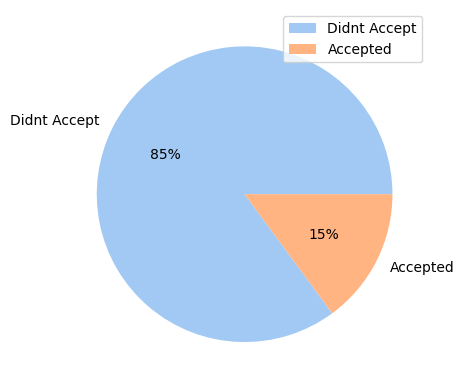

In [101]:
colors = sns.color_palette('pastel')[0:len(df['Response'].value_counts())]

#create pie chart
plt.pie(df['Response'].value_counts(), labels=['Didnt Accept', 'Accepted'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

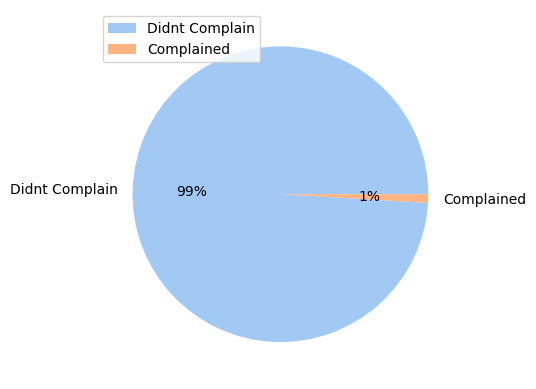

In [102]:
colors = sns.color_palette('pastel')[0:len(df['Complain'].value_counts())]

#create pie chart
plt.pie(df['Complain'].value_counts(), labels=['Didnt Complain', 'Complained'], colors = colors, autopct='%.0f%%')
plt.legend()
plt.show()

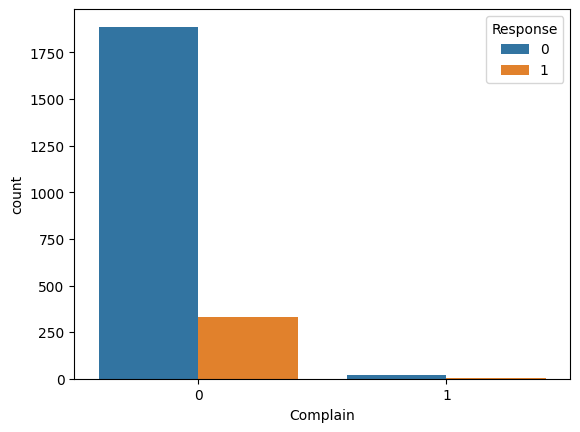

In [103]:
sns.barplot(x = 'Complain', y='count', hue = 'Response',data=df[['Complain', 'Response']].value_counts().reset_index())
    
plt.show()

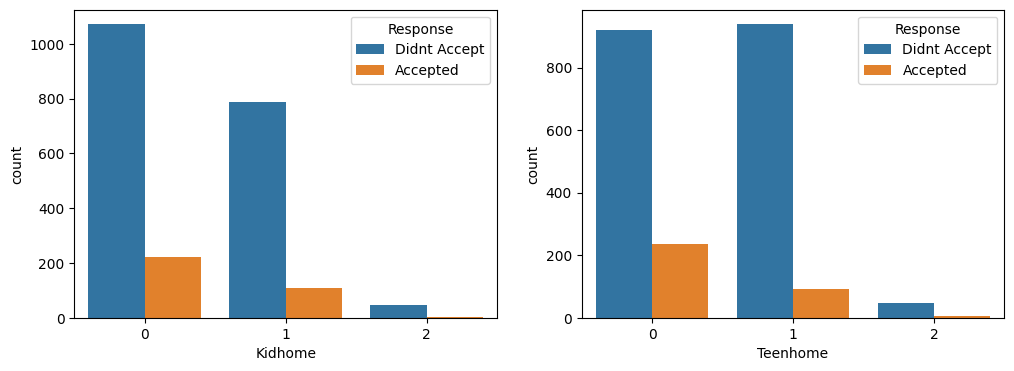

In [104]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 4))

for i, ax, col in zip(range(2), axes.flat, ['Kidhome', 'Teenhome']):
    tmp = df[[col, 'Response']].value_counts().to_frame().reset_index()
    tmp['Response'] = tmp['Response'].replace({0: 'Didnt Accept', 1: 'Accepted'})

    sns.barplot(x = col, y='count', 
                   hue = 'Response',data=tmp, ax=ax)
    
plt.show()

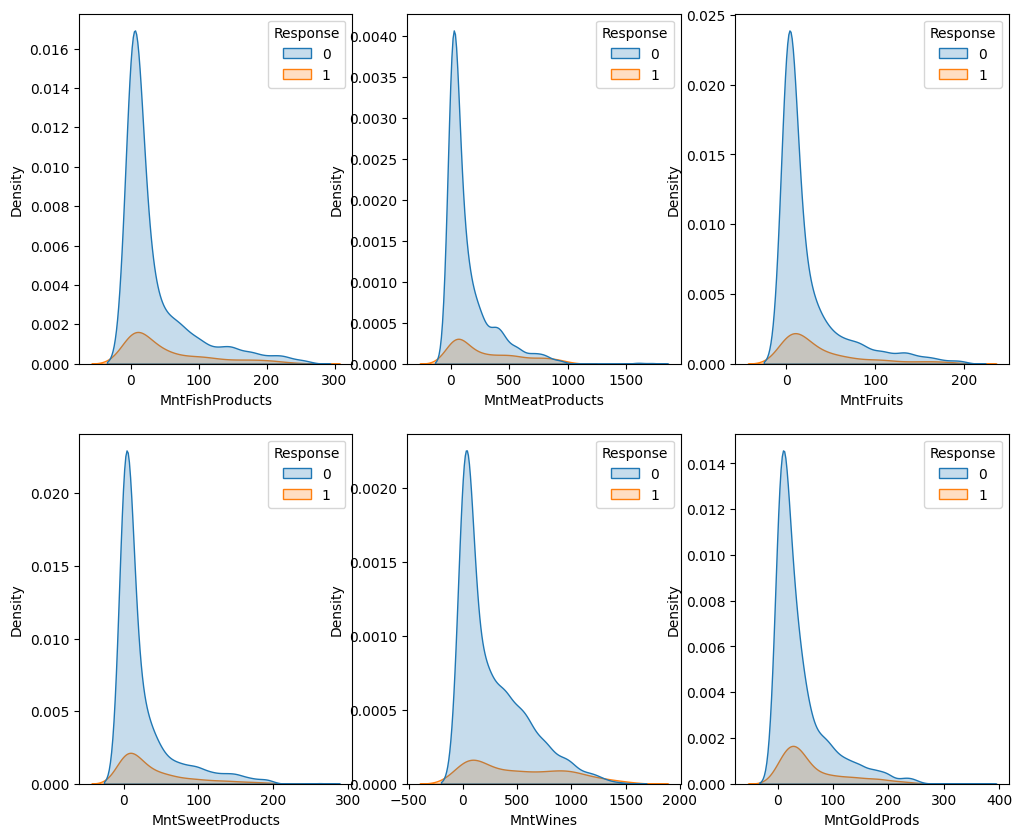

In [105]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 10))

for i, ax, col in zip(range(6), axes.flat, ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']):
    sns.kdeplot(df, x=col, hue='Response', fill=True, ax=ax)
    
plt.show()

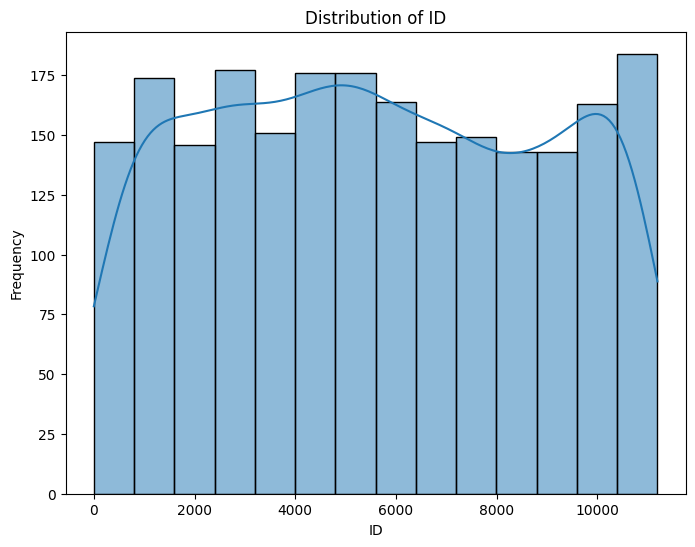

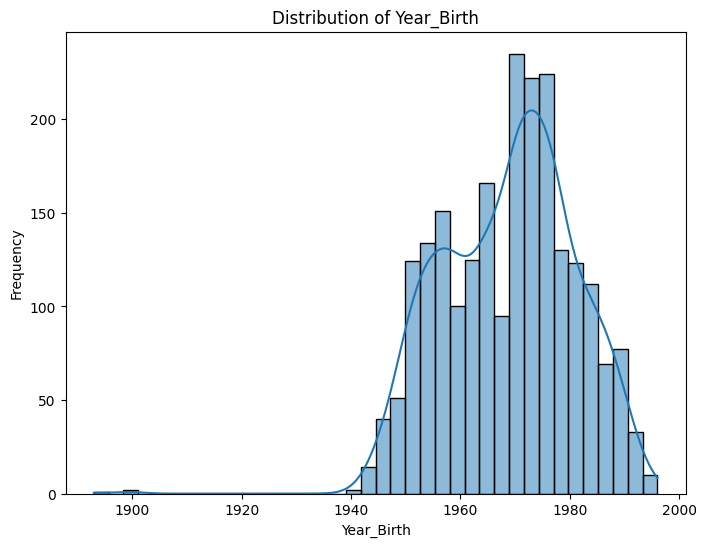

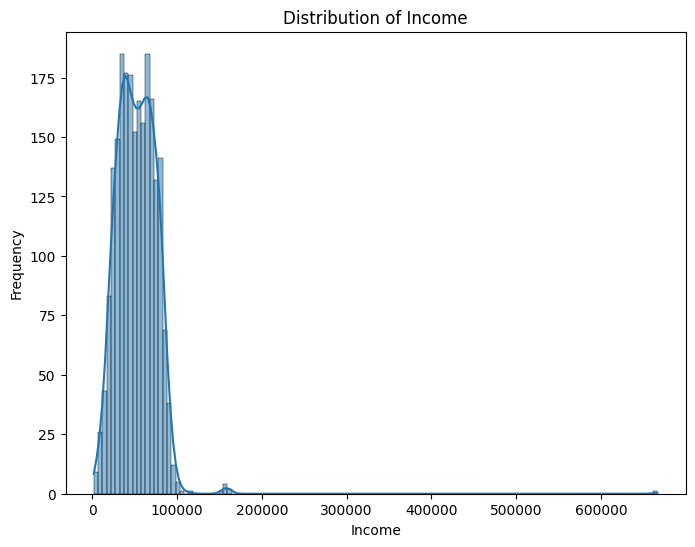

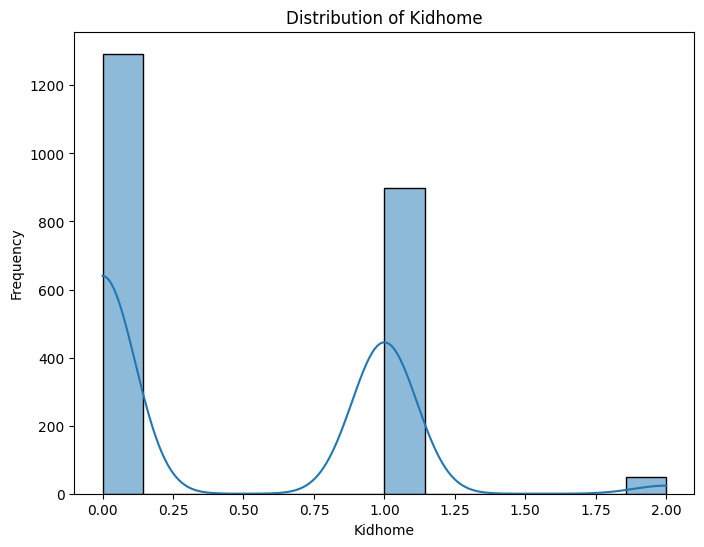

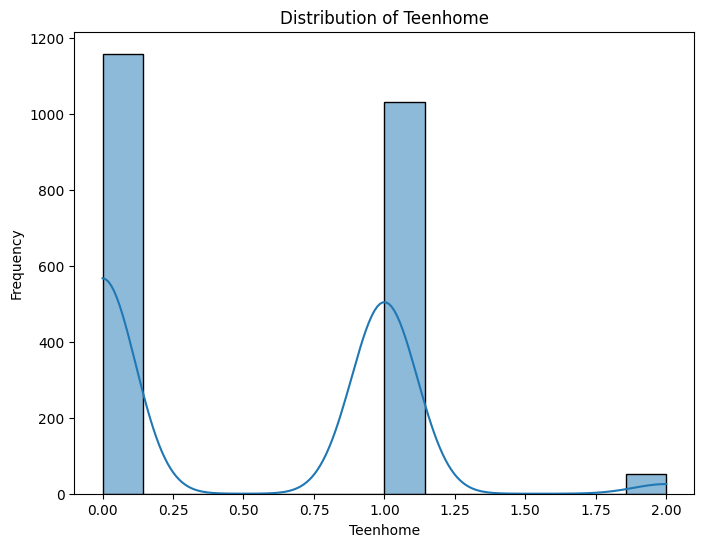

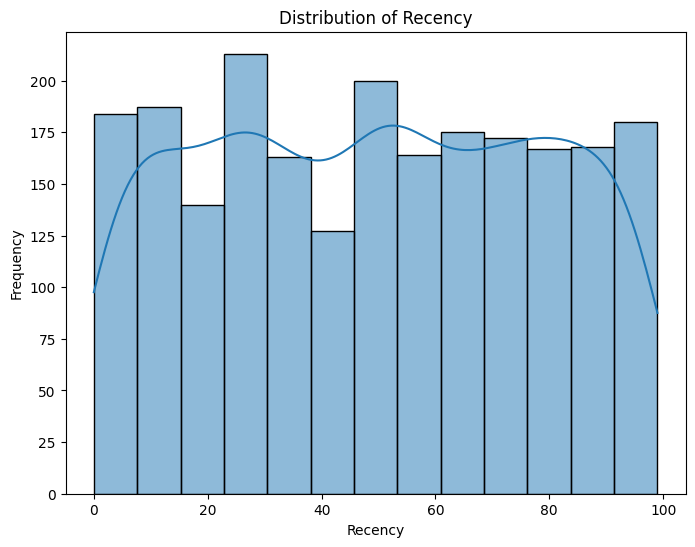

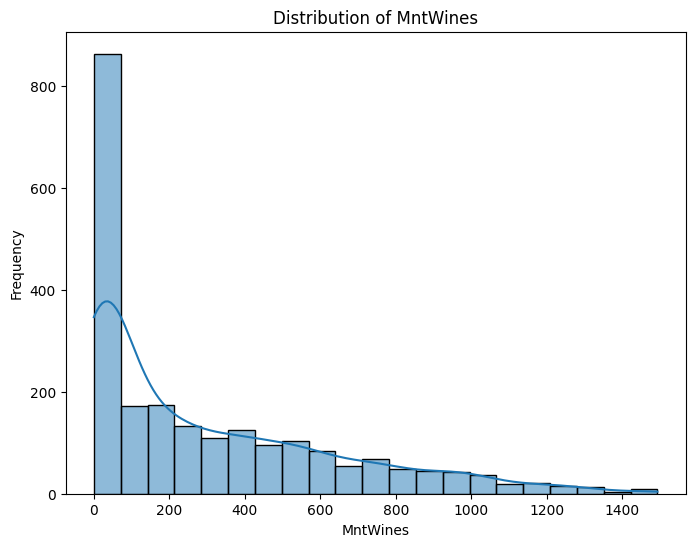

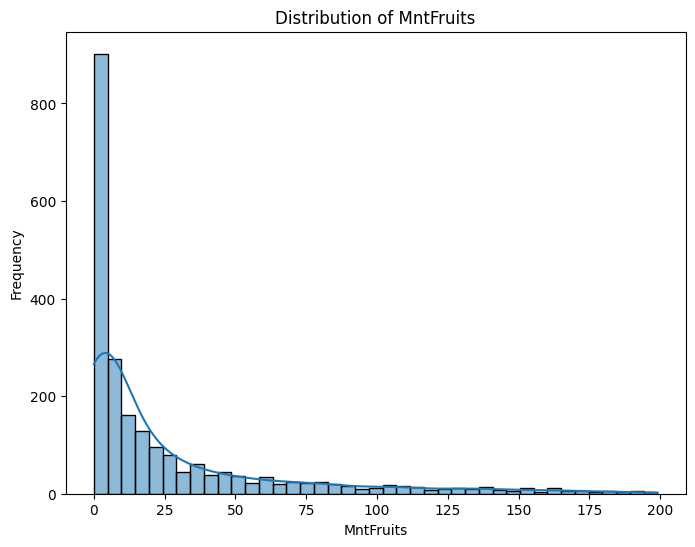

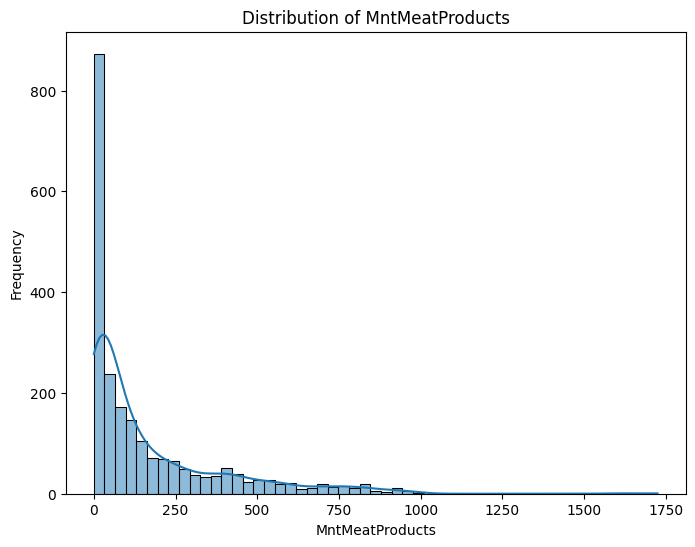

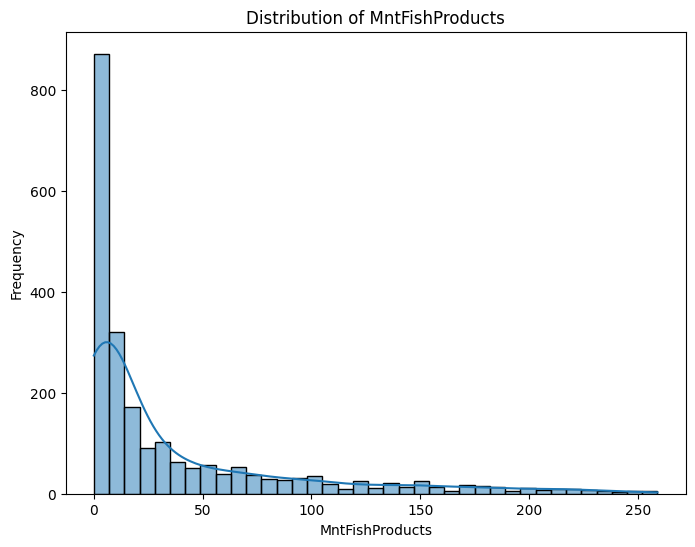

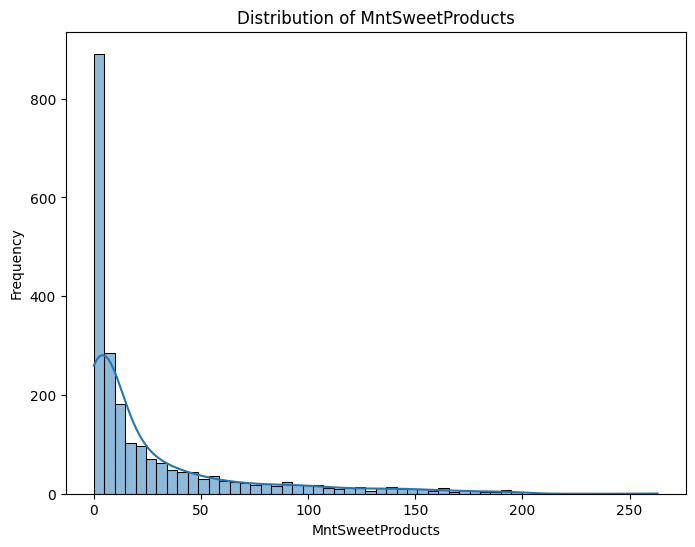

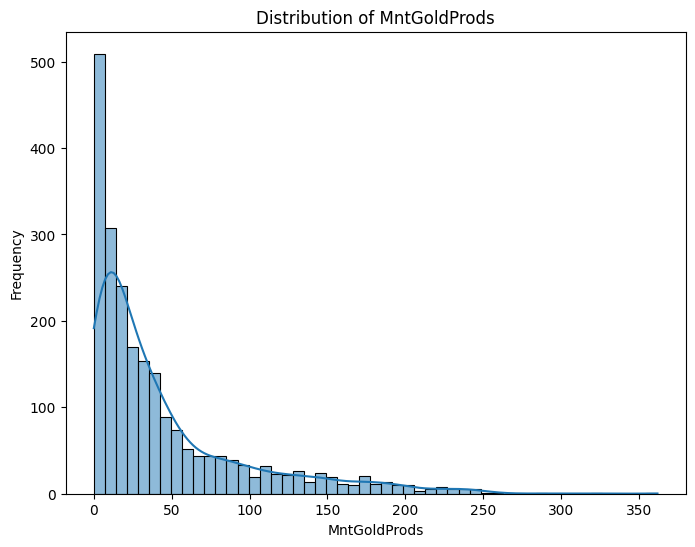

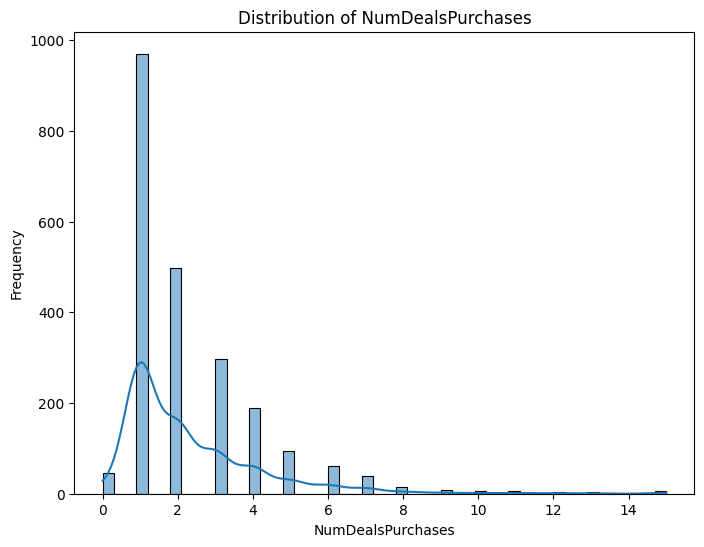

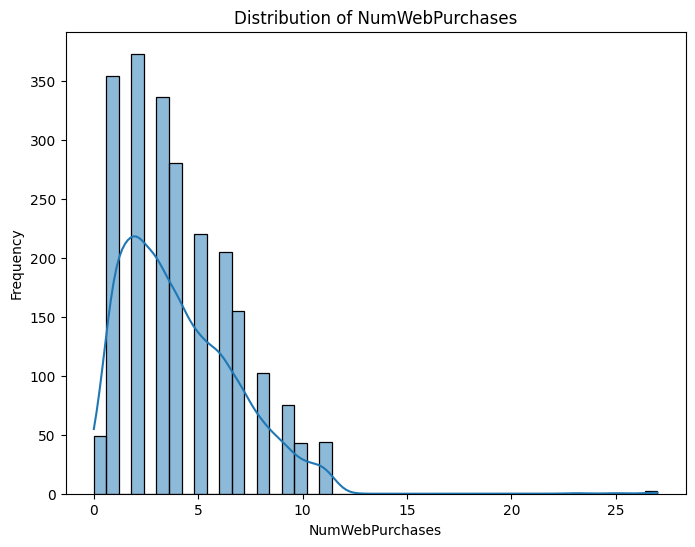

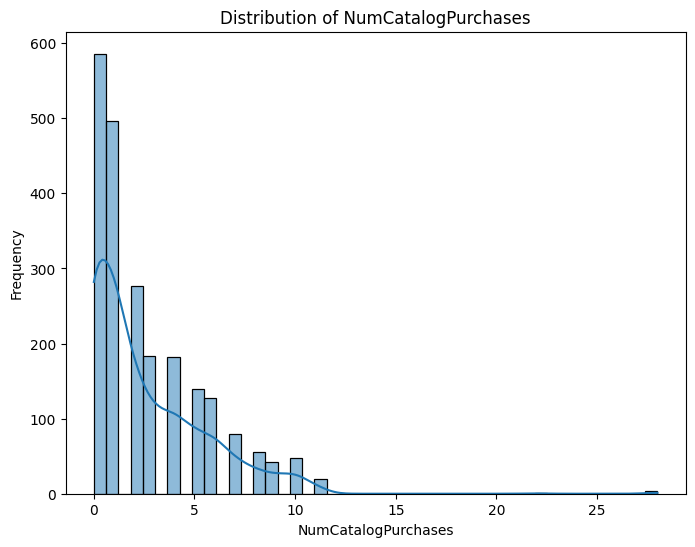

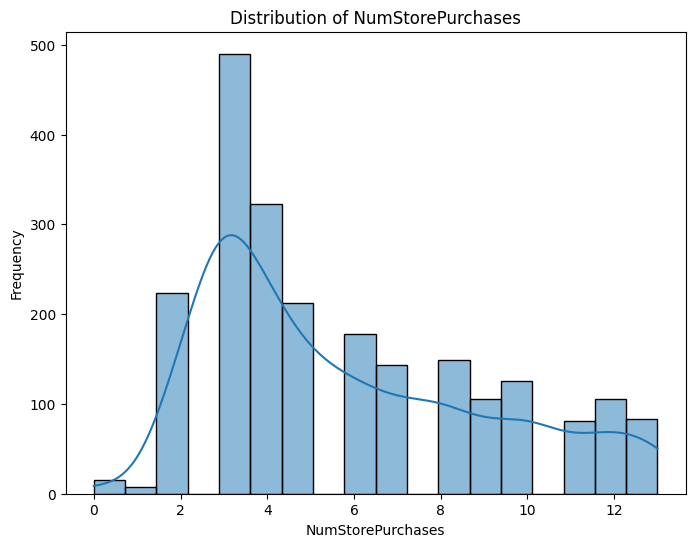

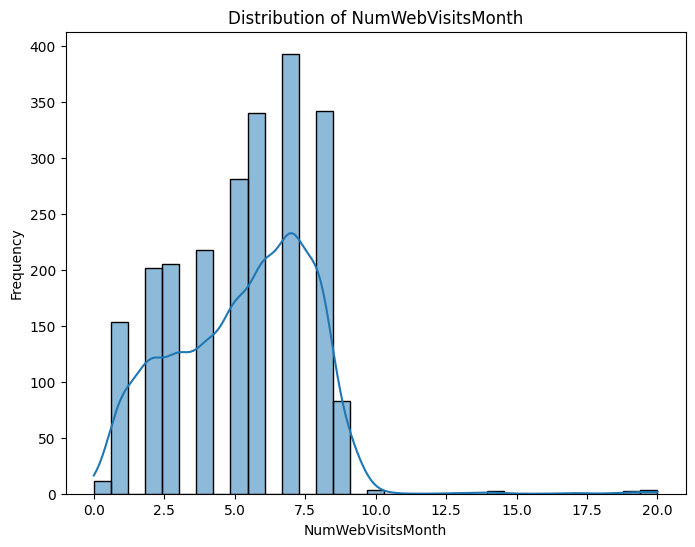

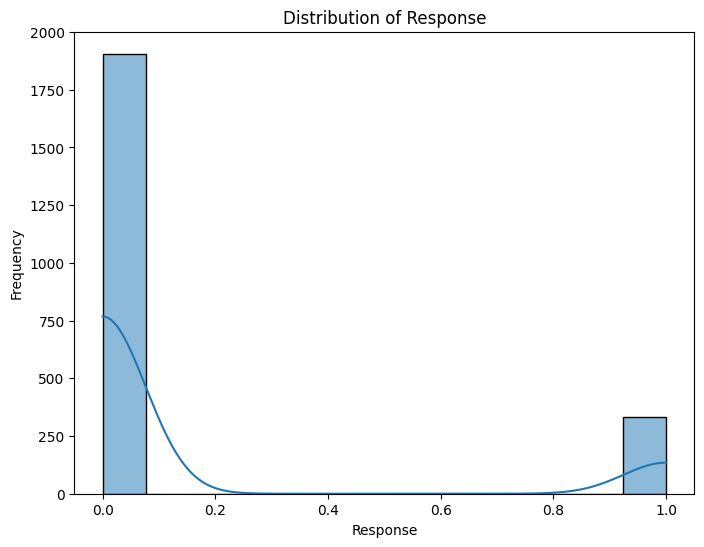

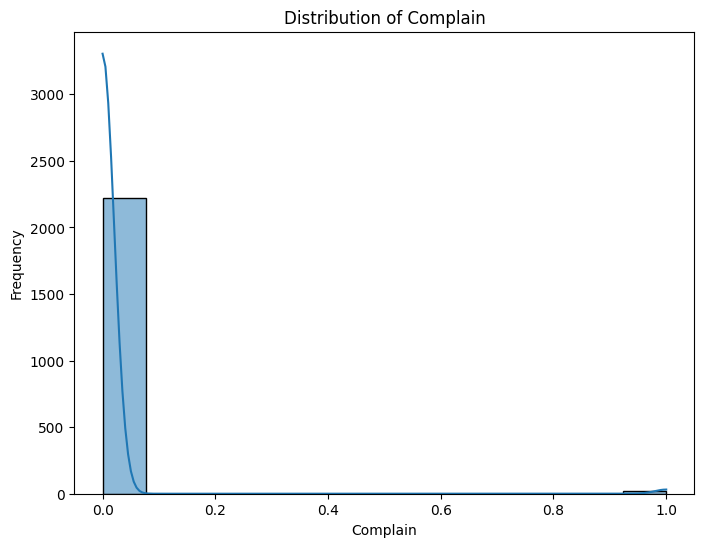

In [106]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

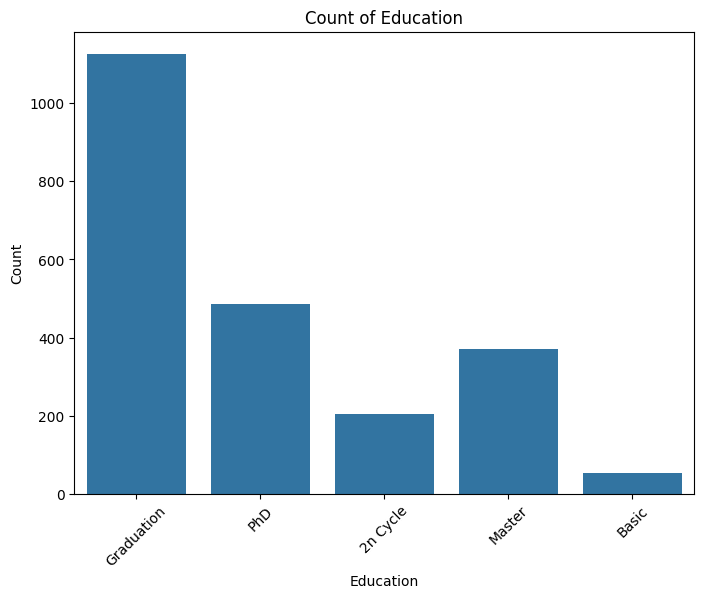

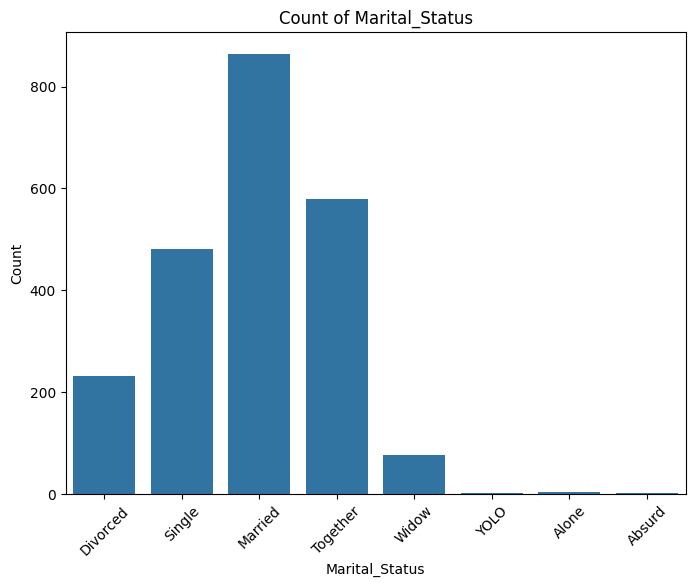

In [107]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

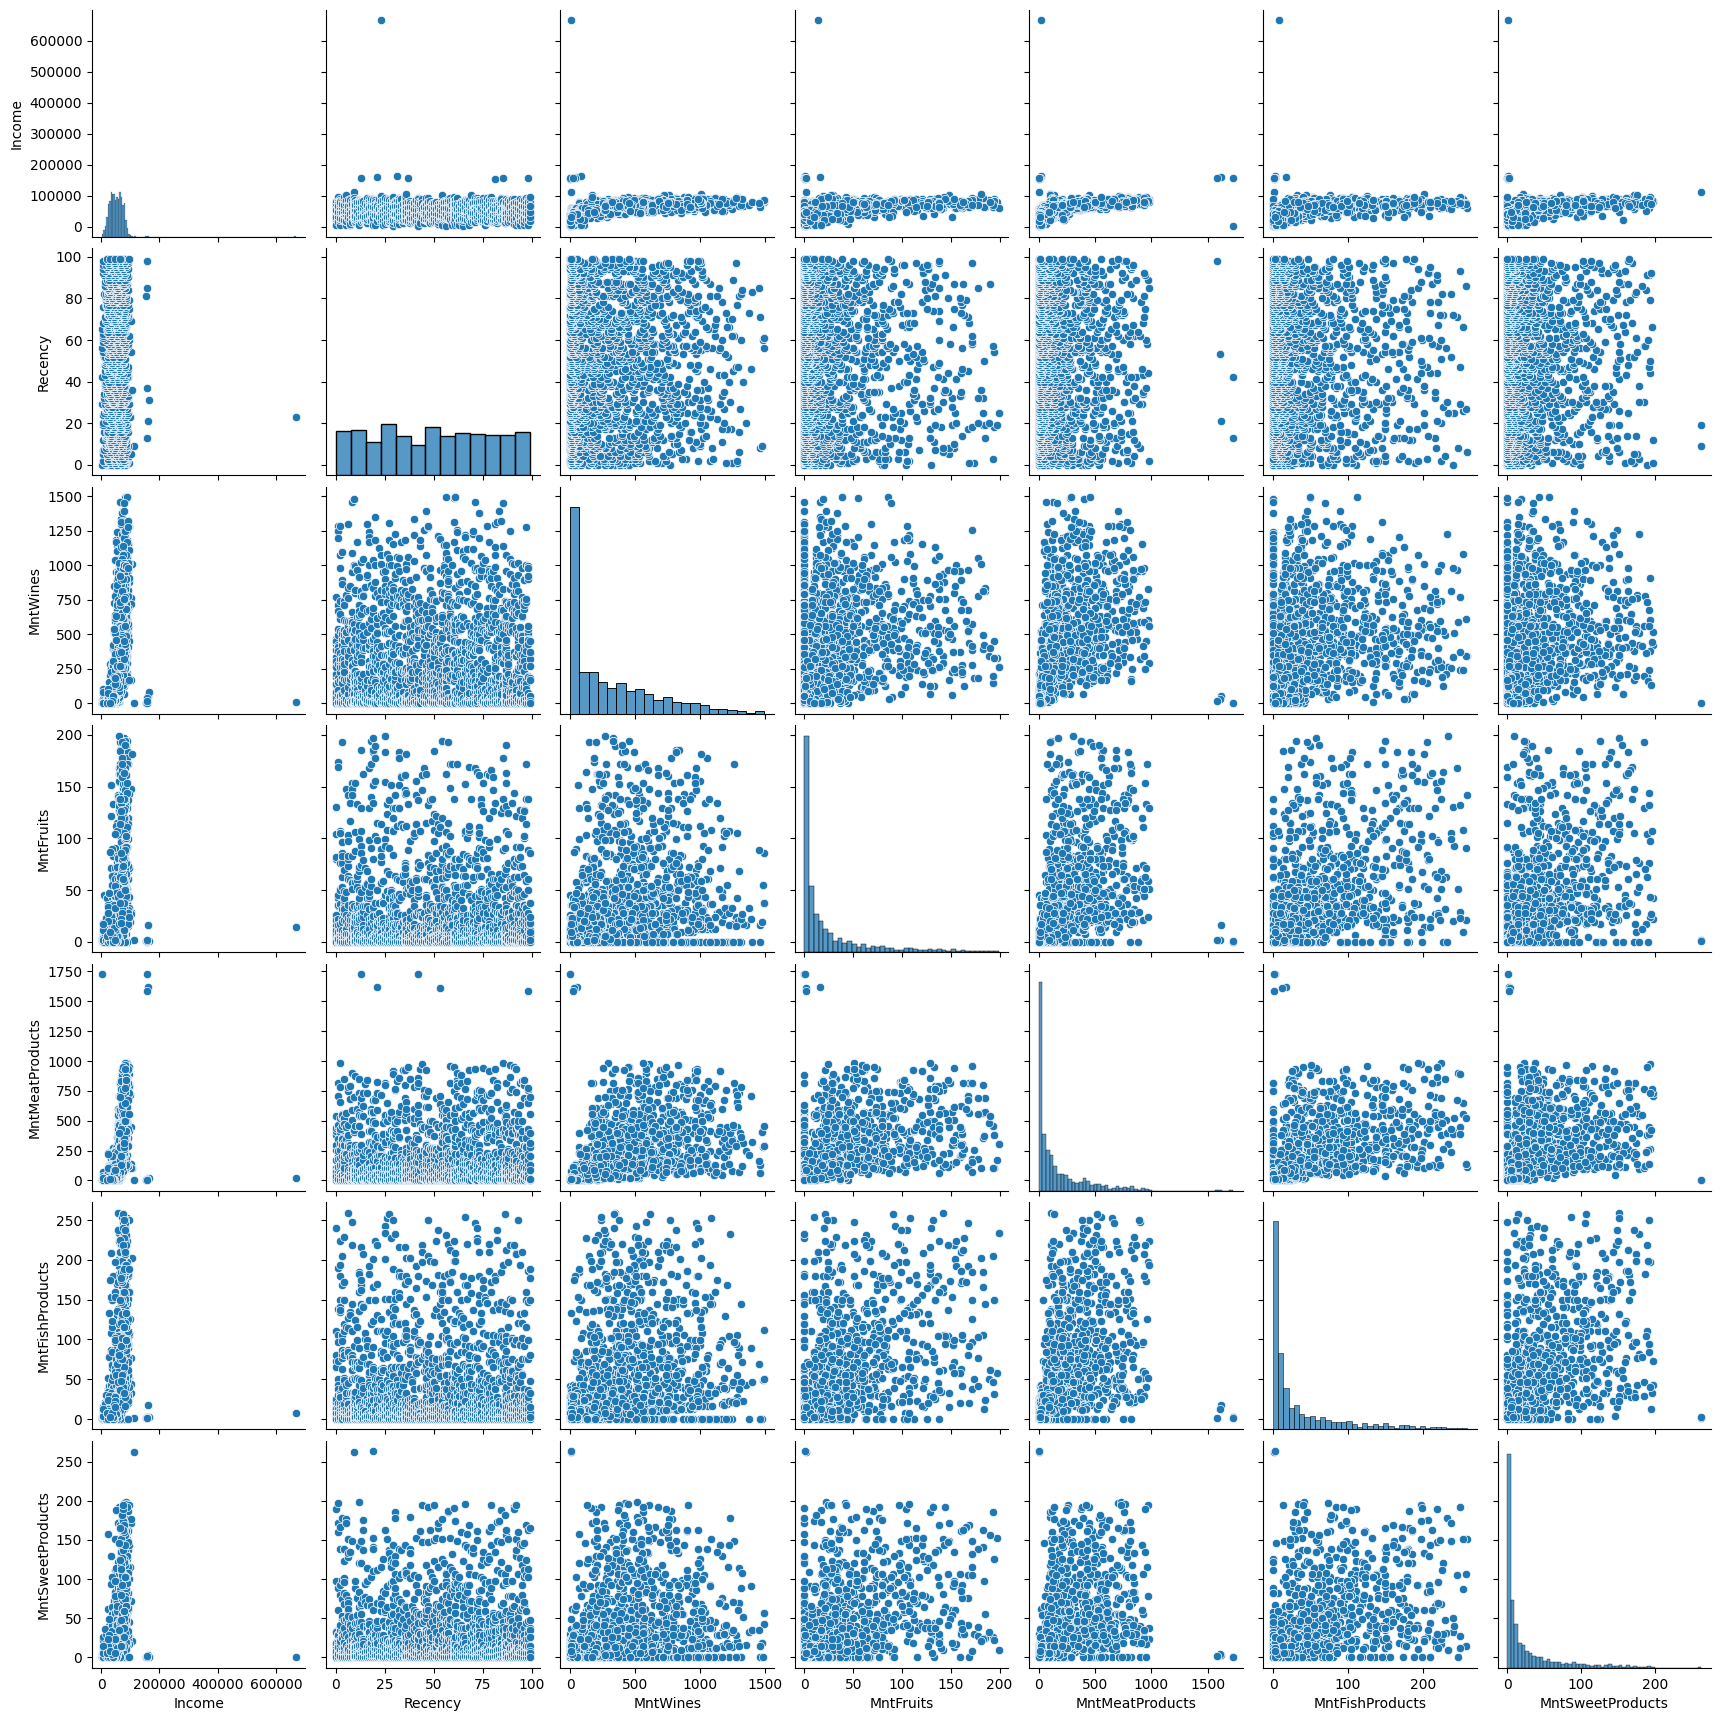

In [108]:
sns.pairplot(df[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']])
plt.show()

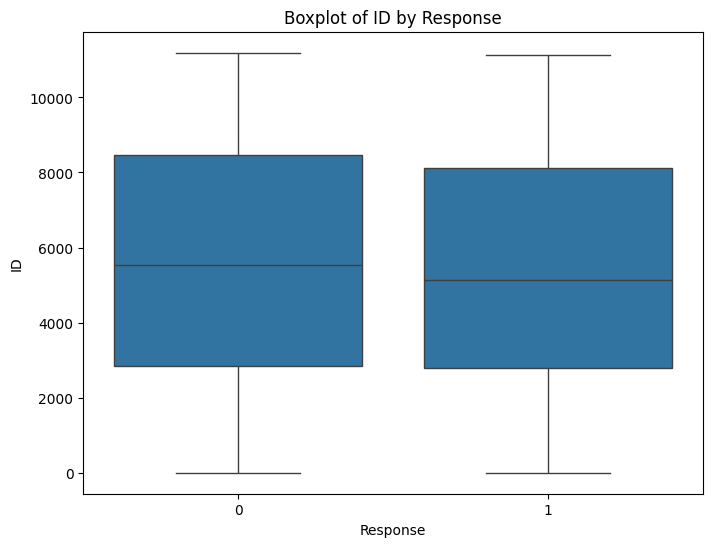

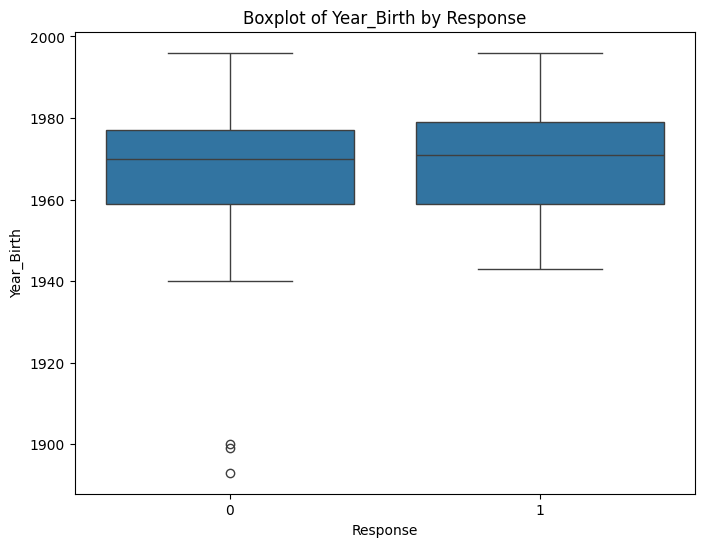

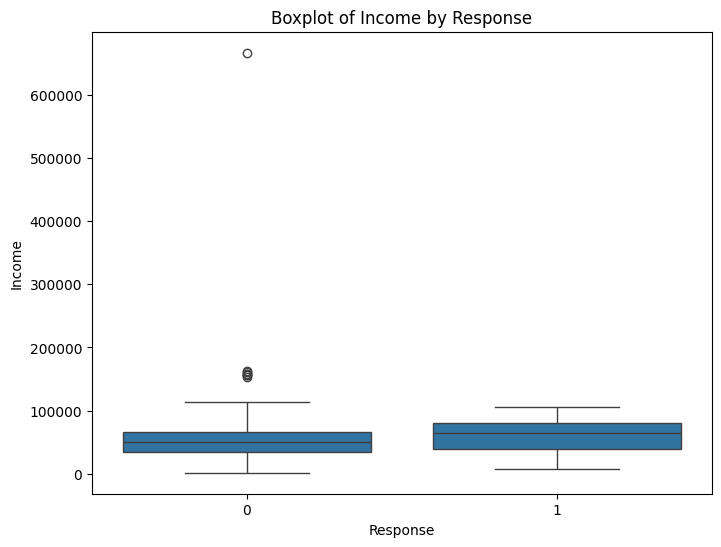

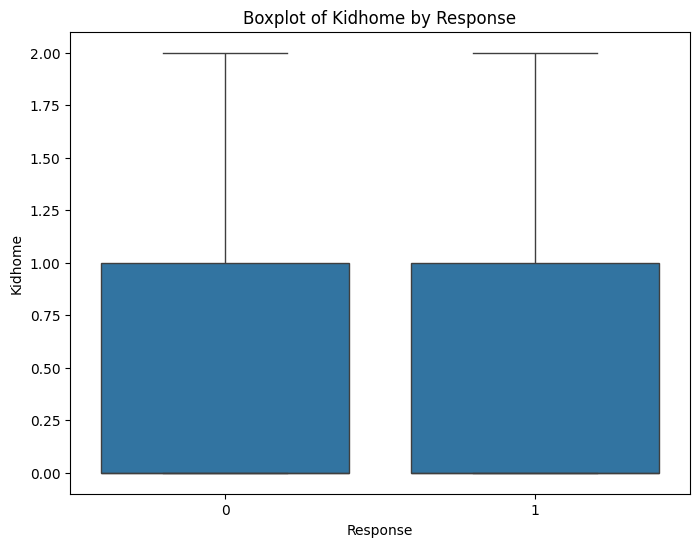

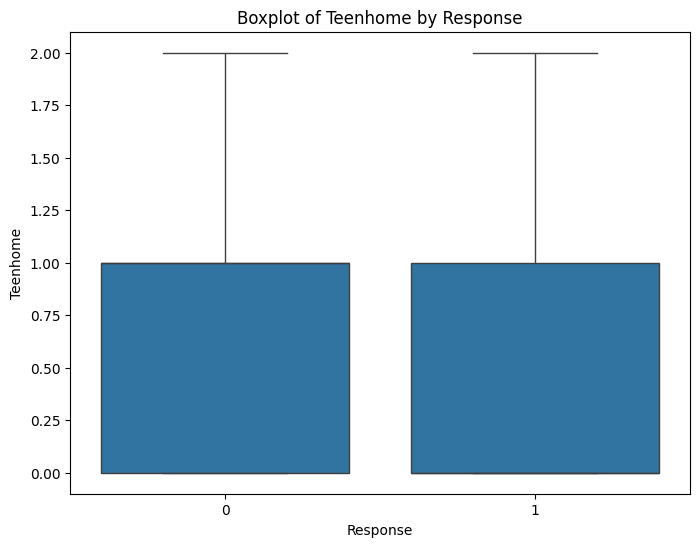

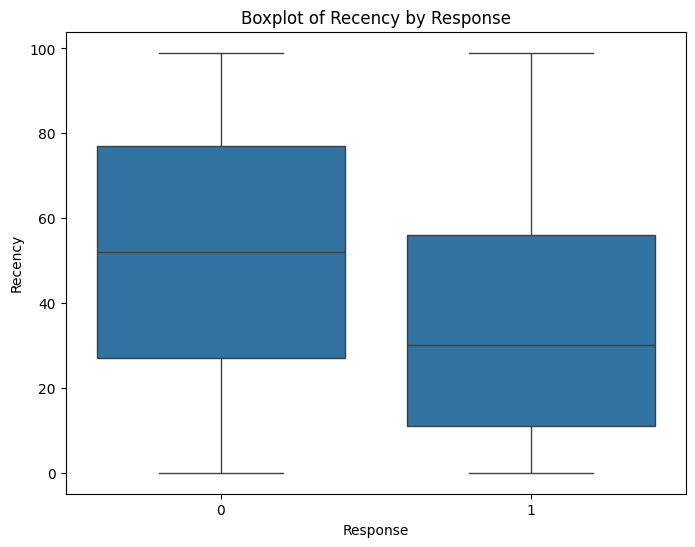

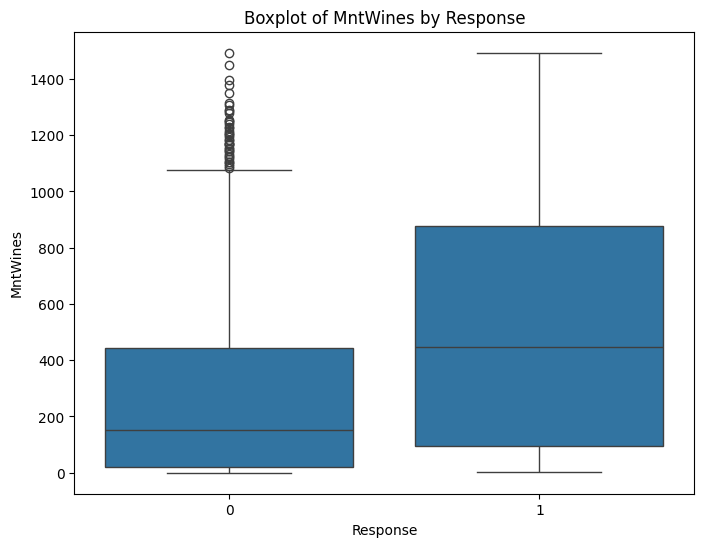

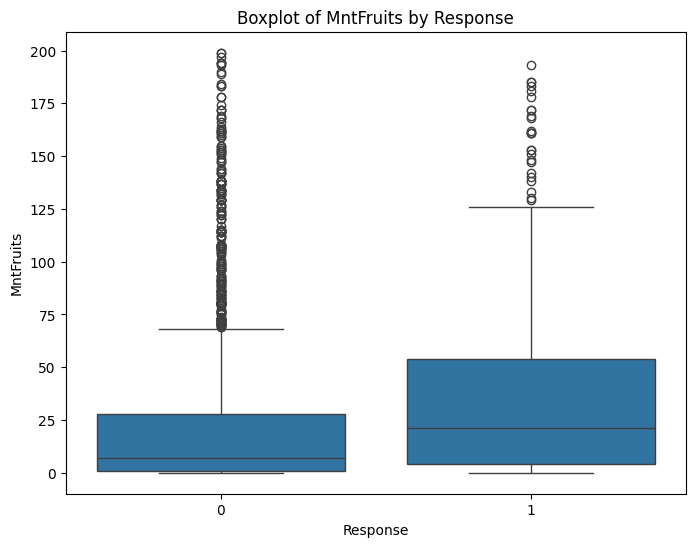

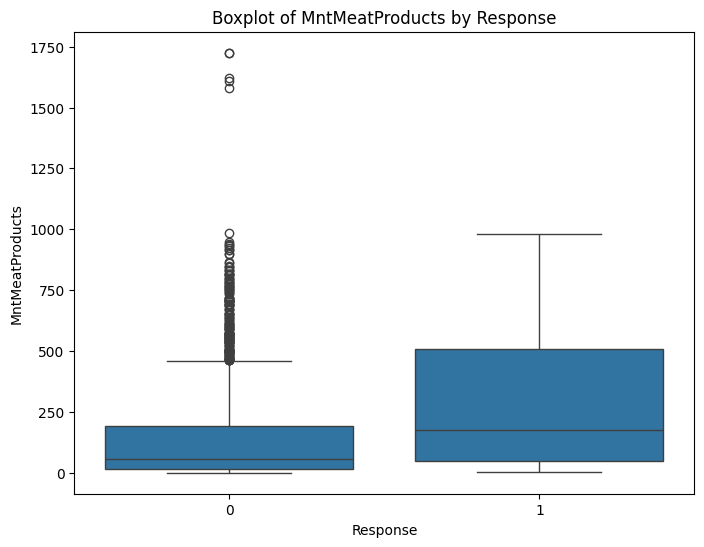

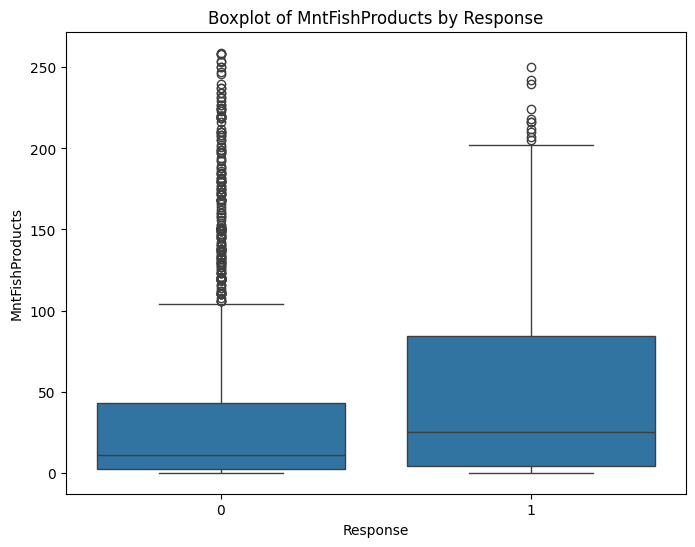

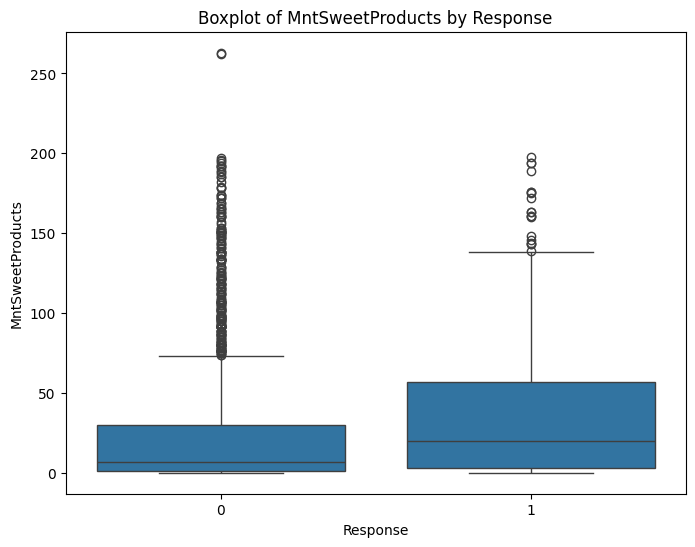

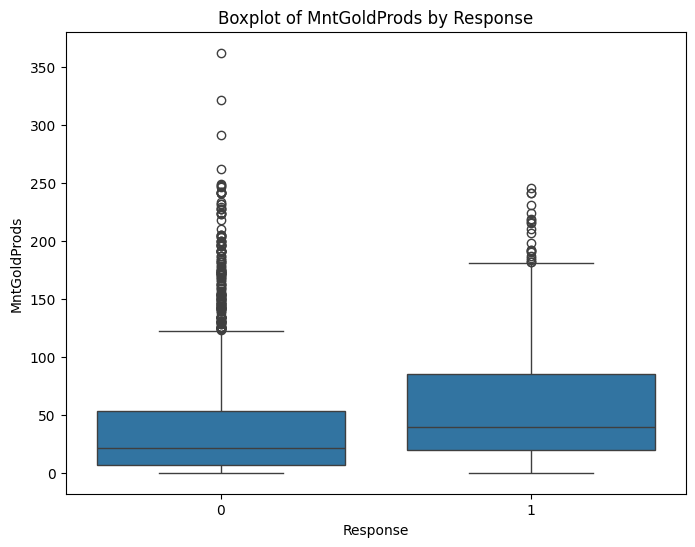

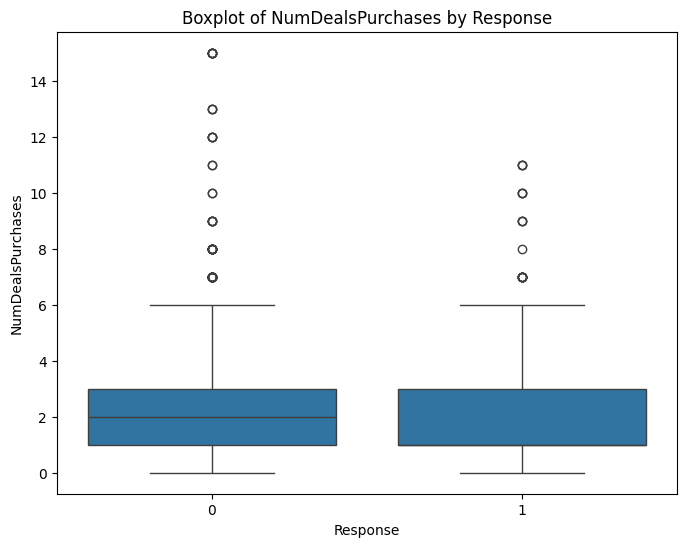

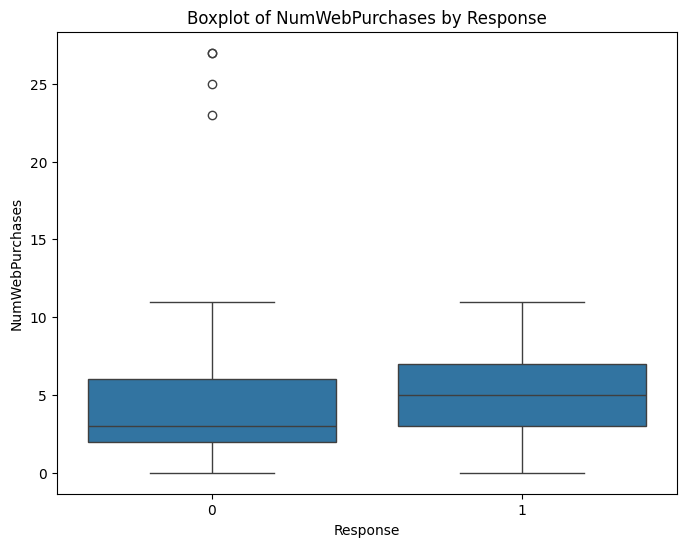

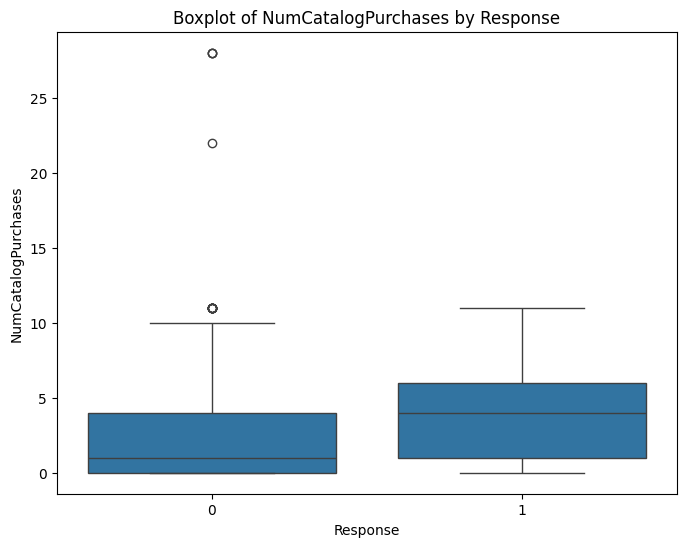

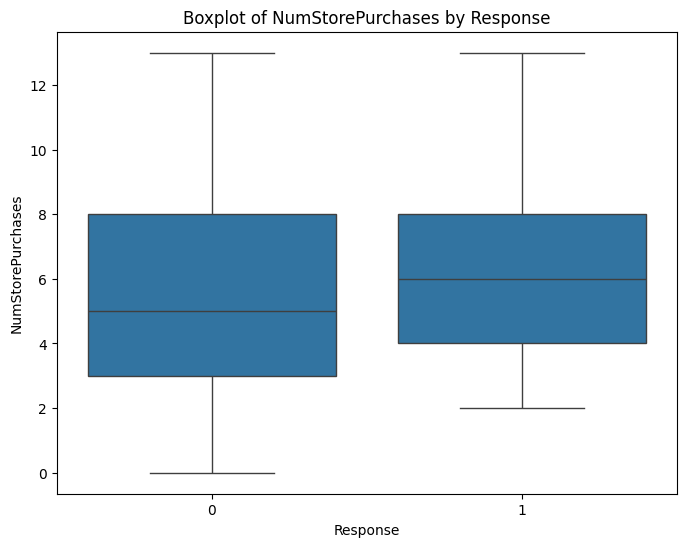

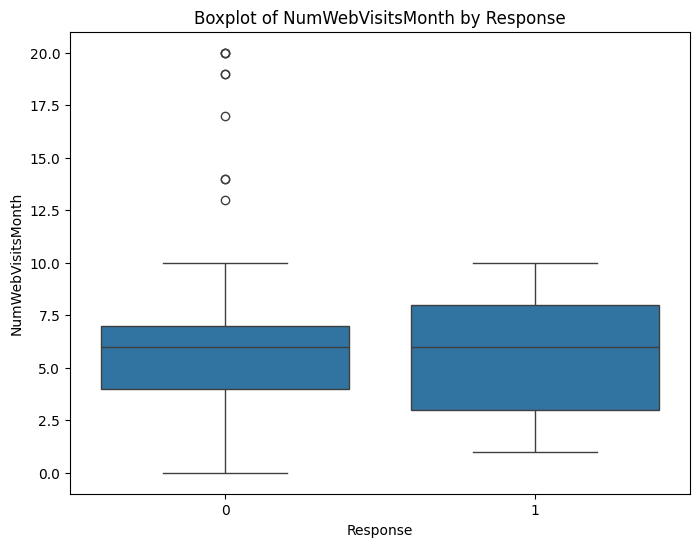

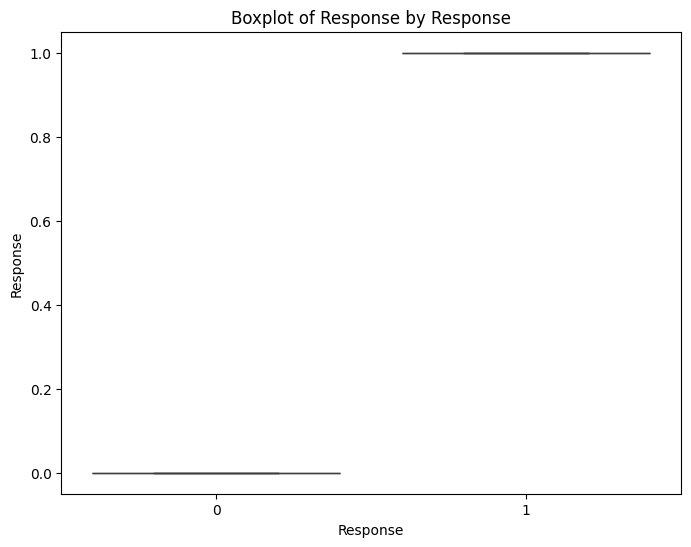

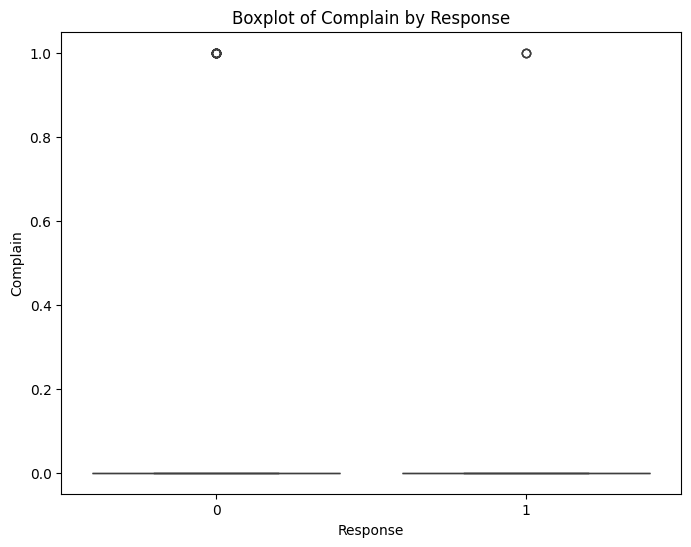

In [109]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Response', y=column)
    plt.title(f'Boxplot of {column} by Response')
    plt.xlabel('Response')
    plt.ylabel(column)
    plt.show()

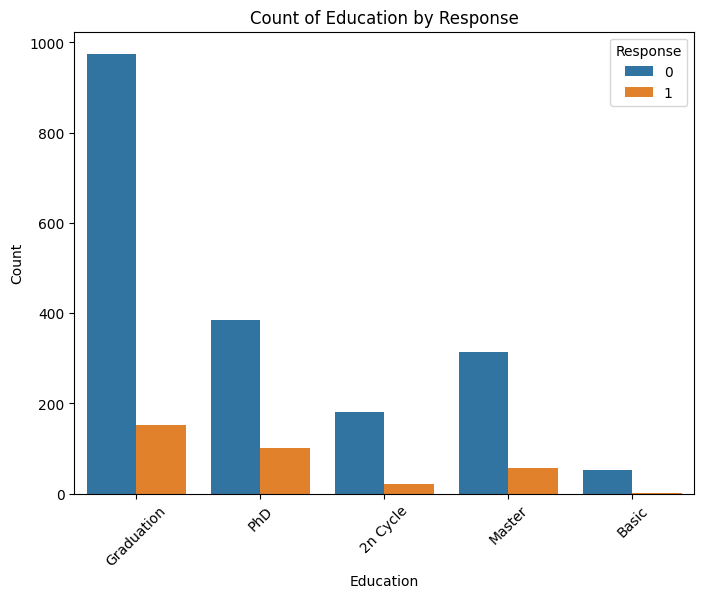

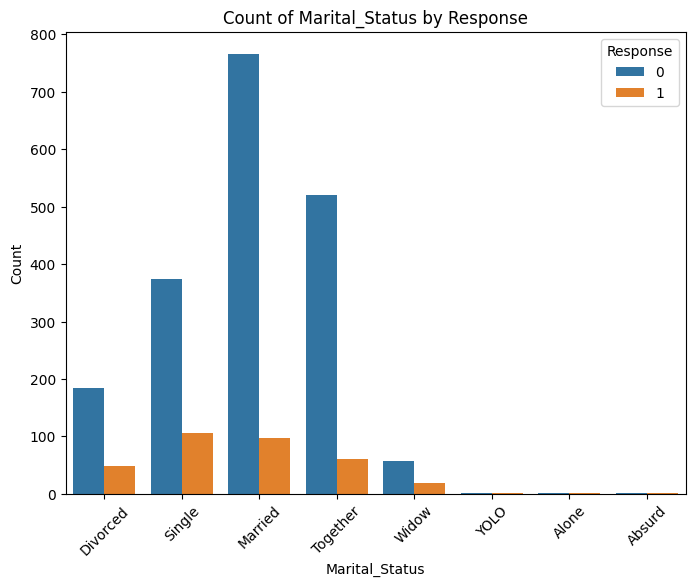

In [110]:
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, hue='Response')
    plt.title(f'Count of {column} by Response')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

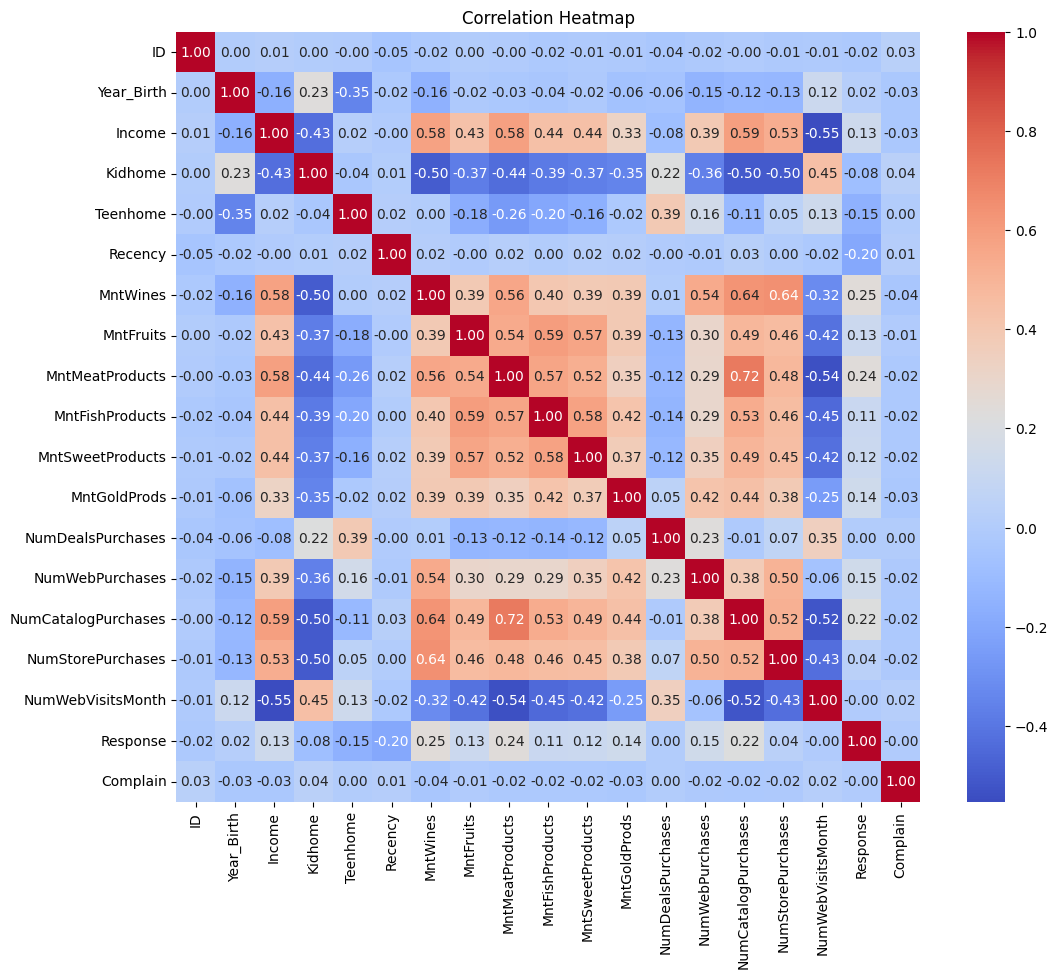

In [111]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

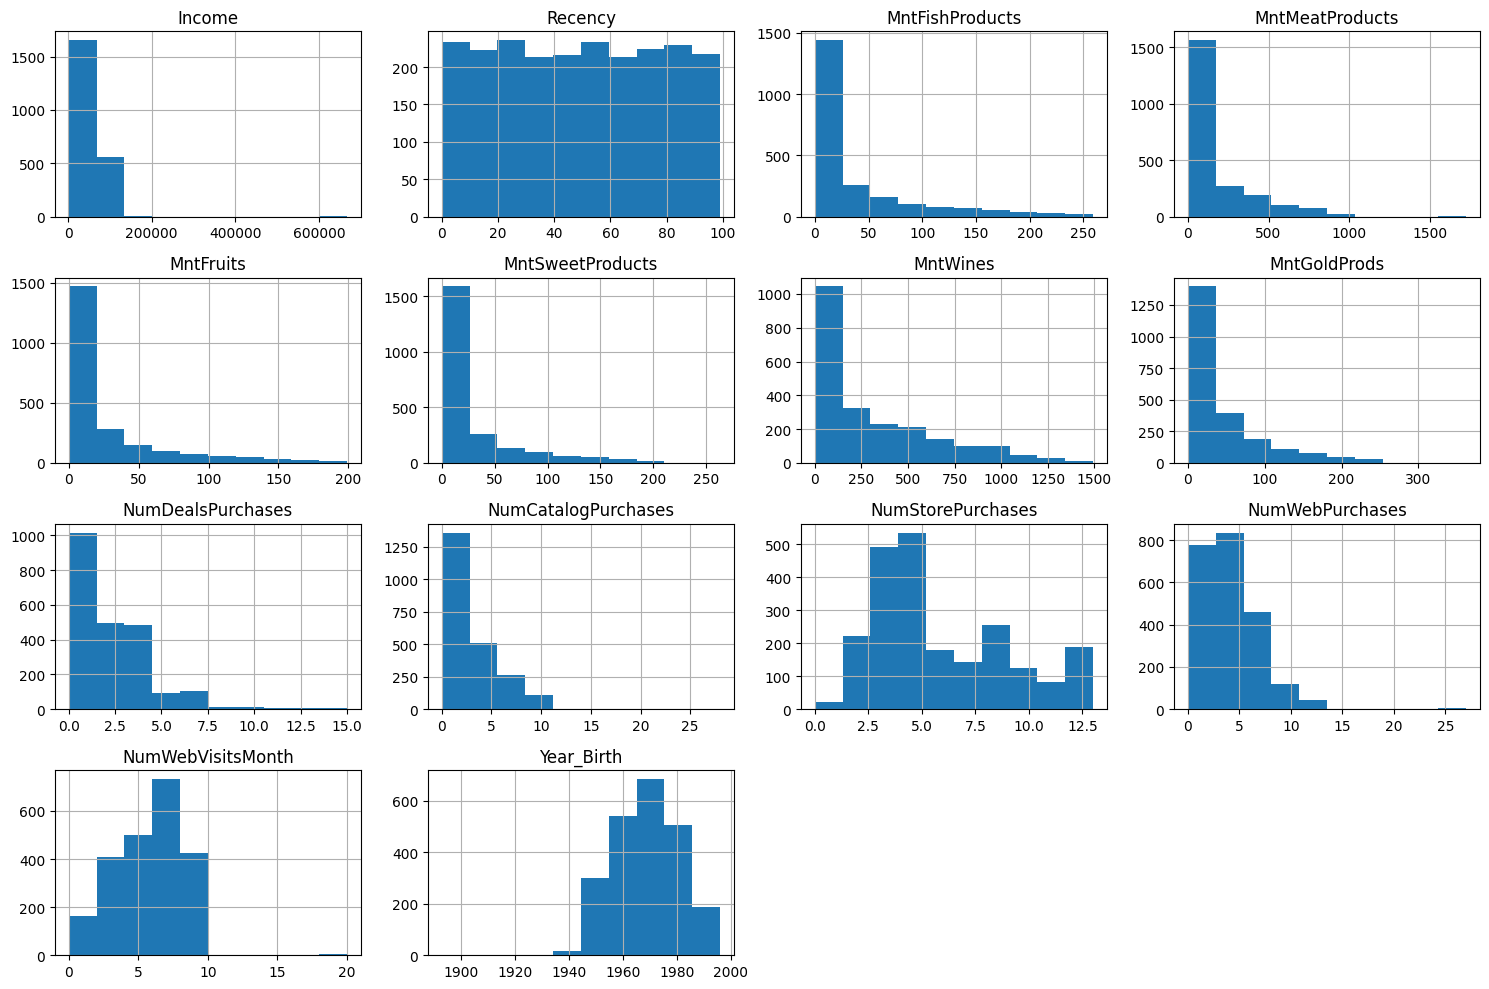

In [112]:
numerical_features = ["Income", "Recency", "MntFishProducts", "MntMeatProducts", 
                      "MntFruits", "MntSweetProducts", "MntWines", "MntGoldProds", 
                      "NumDealsPurchases", "NumCatalogPurchases", "NumStorePurchases", 
                      "NumWebPurchases", "NumWebVisitsMonth", "Year_Birth"]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    df[feature].hist()
    plt.title(feature)
plt.tight_layout()
plt.show()

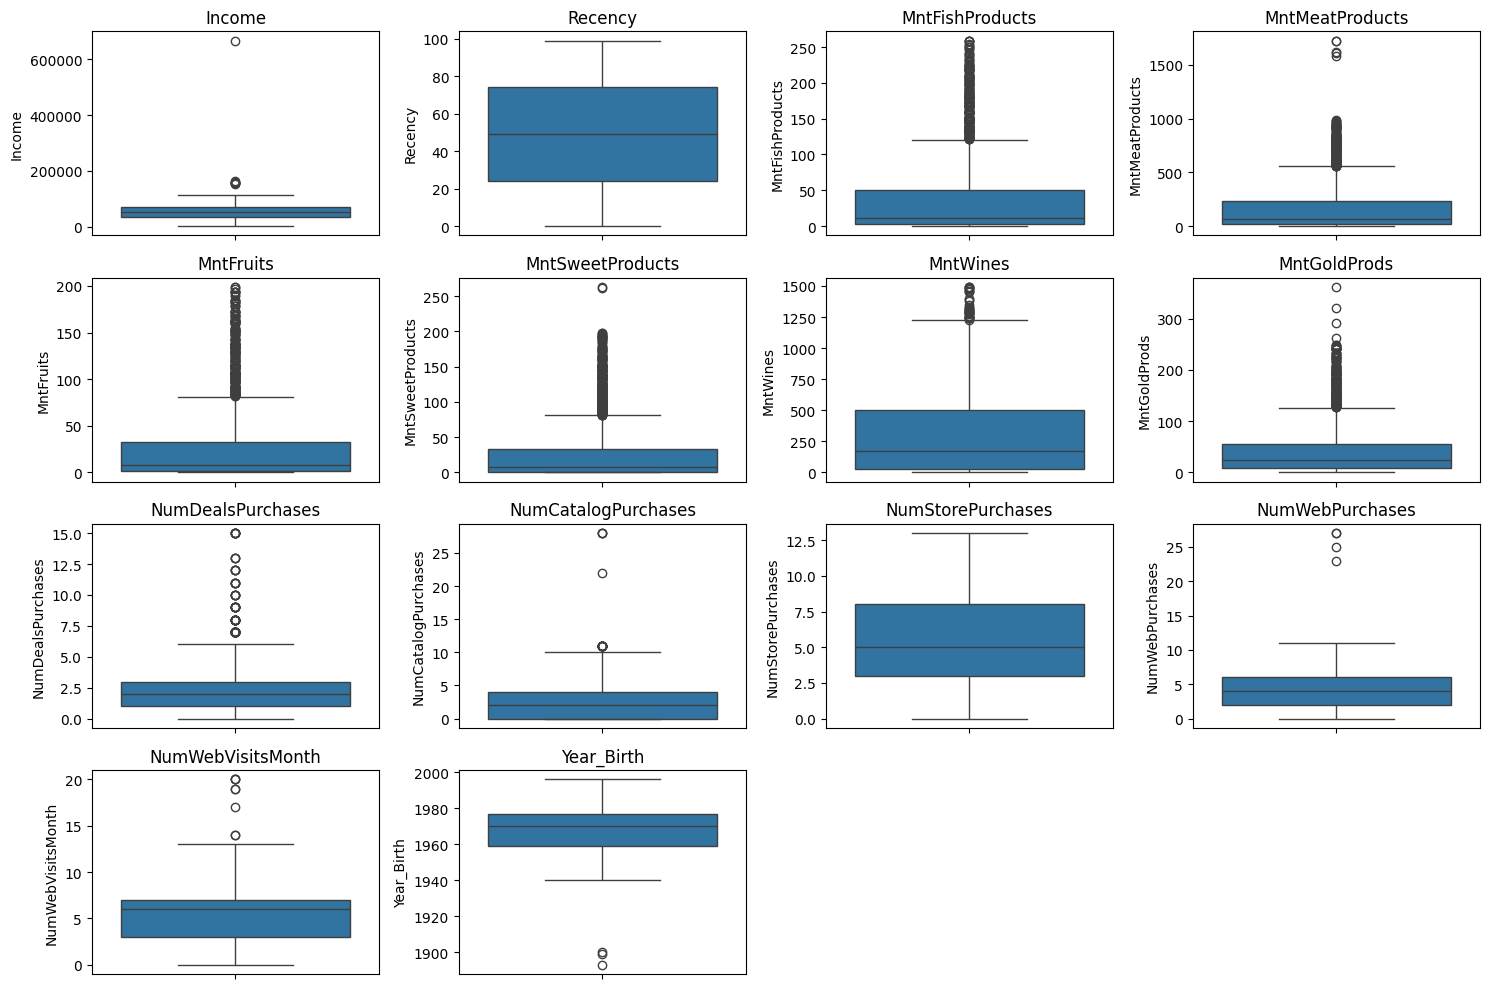

In [113]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

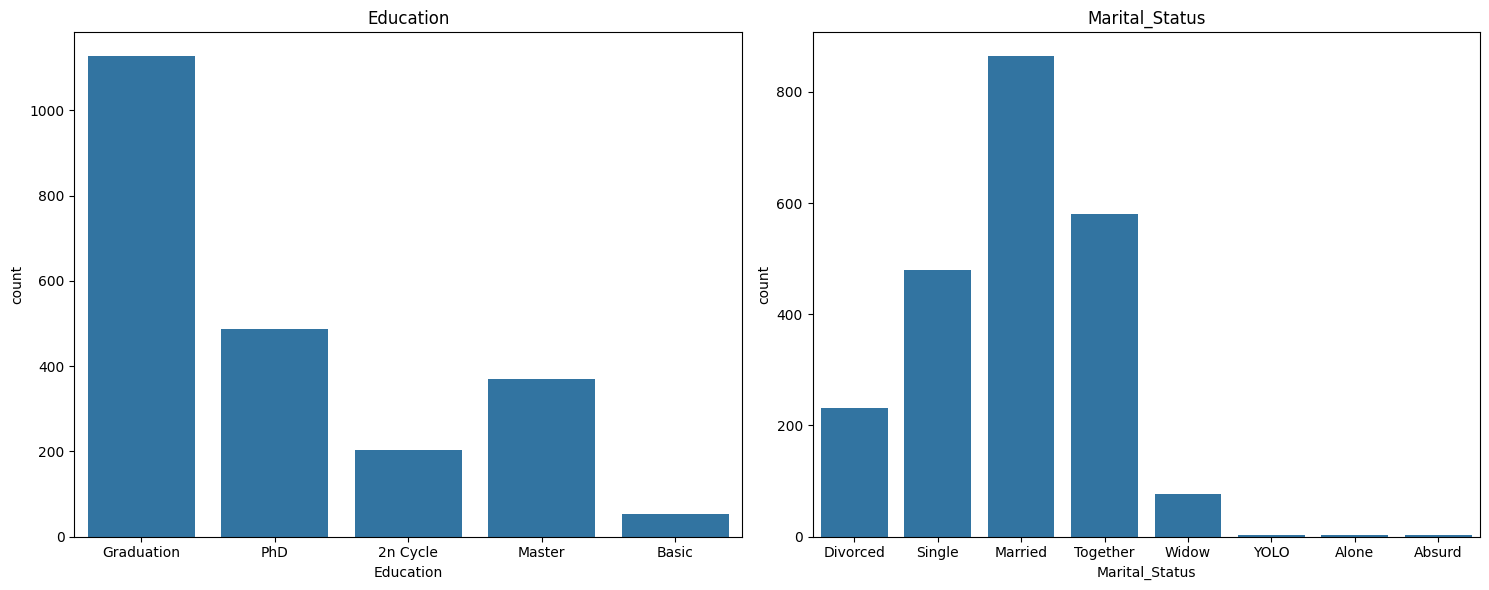

In [114]:
categorical_features = ["Education", "Marital_Status"]

plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, len(categorical_features), i)
    sns.countplot(data=df, x=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

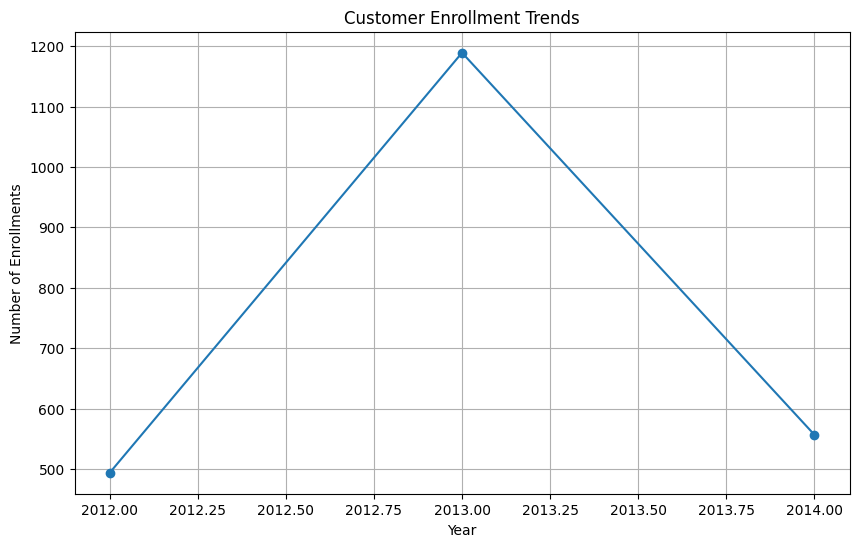

In [115]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Enrollment_Year'] = df['Dt_Customer'].dt.year

plt.figure(figsize=(10, 6))
df.groupby('Enrollment_Year').size().plot(marker='o')
plt.title('Customer Enrollment Trends')
plt.xlabel('Year')
plt.ylabel('Number of Enrollments')
plt.grid(True)
plt.show()

# Preprocessing

## Removed invlalid birth years

In [116]:
original_length = len(df)
print("Original number of rows: ", original_length)

max_realistic_year = pd.Timestamp.now().year - 100

# Filter the DataFrame to keep only rows where Year_Birth is greater than the maximum realistic year
df = df[df['Year_Birth'] > max_realistic_year]

current_length = len(df)

# Calculate the number of rows removed
rows_removed = original_length - current_length
print(rows_removed)

Original number of rows:  2240
3


## Changed Dt_Customer to days from now (days enrolled)

In [117]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Calculate the number of days until the current date
df['Dt_Customer'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days

C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_2256\1339601698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Sara Limeta\AppData\Local\Temp\ipykernel_2256\1339601698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dt_Customer'] = (pd.Timestamp.now() - df['Dt_Customer']).dt.days


## removed purchases of products but no purchases through channels

In [118]:
current_length = len(df)
print(current_length)
product_purchases_no_channel_purchase = df[(df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                                           df['MntFishProducts'] + df['MntSweetProducts'] +
                                           df['MntGoldProds'] > 0) &
                                          ((df['NumDealsPurchases'] == 0) &
                                           (df['NumWebPurchases'] == 0) &
                                           (df['NumCatalogPurchases'] == 0) &
                                           (df['NumStorePurchases'] == 0))]

# Remove the rows with invalid purchases
df = df.drop(product_purchases_no_channel_purchase.index)

current_length = len(df)
print(current_length)

2237
2233


## choosing features to include in the model (currently, all features bc no feature selection yet

In [119]:
df =df[['Response', 'Income',  'Education', 'Marital_Status','Year_Birth',	'Kidhome',	'Teenhome',	'Dt_Customer',	'Recency',	'MntWines',	'MntFruits',	'MntMeatProducts',	'MntFishProducts',	'MntSweetProducts',	'MntGoldProds',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth',	'Complain'
]]
current_length = len(df)
print(current_length)

2233


## Transformed Education into numerical values using ordinal encoding

In [120]:
# Define the mapping of education levels to ordinal integers
education_mapping = {
    'Basic': 1,
    '2n Cycle': 2,
    'Graduation': 3,
    'Master': 4,
    'PhD': 5
}

# Perform ordinal encoding using the mapping
df['Education'] = df['Education'].replace(education_mapping)


## Transformed Marital_Status using one-hot encoding

In [121]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
   
    data = data.join(encoded)
    return data

df = one_hot_encode(df, ['Marital_Status'])
df

Response   Income  Education Marital_Status  Year_Birth  Kidhome  \
0            1  84835.0          3       Divorced        1970        0   
1            1  57091.0          3         Single        1961        0   
2            0  67267.0          3        Married        1958        0   
3            0  32474.0          3       Together        1967        1   
4            1  21474.0          3         Single        1989        1   
...        ...      ...        ...            ...         ...      ...   
2235         0  66476.0          5       Divorced        1976        0   
2236         0  31056.0          2        Married        1977        1   
2237         0  46310.0          3       Divorced        1976        1   
2238         0  65819.0          3        Married        1978        0   
2239         1  94871.0          5        Married        1969        0   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0         3543        0       189  ...                  6   
1            0         3544        0       464  ...                  7   
2            1         3577        0       134  ...                  5   
3            1         3401        0        10  ...                  2   
4            0         3494        0         6  ...                  2   
...        ...          ...      ...       ...  ...                ...   
2235         1         3891       99       372  ...                 11   
2236         0         4053       99         5  ...                  3   
2237         0         4369       99       185  ...                  5   
2238         0         4107       99       267  ...                 10   
2239         2         4432       99       169  ...                  4   

      NumWebVisitsMonth  Complain  Marital_Status_Alone  \
0                     1         0                 False   
1                     5         0                 False   
2                     2         0                 False   
3                     7         0                 False   
4                     7         0                 False   
...                 ...       ...                   ...   
2235                  4         0                 False   
2236                  8         0                 False   
2237                  8         0                 False   
2238                  3         0                 False   
2239                  7         0                 False   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        True                   False                  False   
1                       False                   False                   True   
2                       False                    True                  False   
3                       False                   False                  False   
4                       False                   False                   True   
...                       ...                     ...                    ...   
2235                     True                   False                  False   
2236                    False                    True                  False   
2237                     True                   False                  False   
2238                    False                    True                  False   
2239                    False                    True                  False   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                       False                 False                False  
1                       False                 False                False  
2                       False                 False                False  
3                        True                 False                False  
4                       False                 False                False  
...                       ...                   ...                  ...  
2235                    False    

## Removing outliers for Income

In [122]:
def find_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Display outliers for specific columns
columns_of_interest = ['Income']
rows_remaining = {}

for column_name in columns_of_interest:
    outliers = find_outliers_iqr(df[column_name])
    count = outliers.shape[0]  # Number of outliers
    print(f"Column: {column_name}")
    print(f"Number of outliers in column '{column_name}': {count}")
    print()


Column: Income
Number of outliers in column 'Income': 6



In [123]:
# Removal of outliers
for column_name in columns_of_interest:
    outliers = find_outliers_iqr(df[column_name])
    df = df.drop(outliers.index)
    rows_remaining[column_name] = len(df)

# Display the number of rows remaining after removal for each column
print("Number of rows remaining after outlier removal:")
for column_name, rows_left in rows_remaining.items():
    print(f"Column '{column_name}': {rows_left}")


Number of rows remaining after outlier removal:
Column 'Income': 2227


In [124]:
df

Response   Income  Education Marital_Status  Year_Birth  Kidhome  \
0            1  84835.0          3       Divorced        1970        0   
1            1  57091.0          3         Single        1961        0   
2            0  67267.0          3        Married        1958        0   
3            0  32474.0          3       Together        1967        1   
4            1  21474.0          3         Single        1989        1   
...        ...      ...        ...            ...         ...      ...   
2235         0  66476.0          5       Divorced        1976        0   
2236         0  31056.0          2        Married        1977        1   
2237         0  46310.0          3       Divorced        1976        1   
2238         0  65819.0          3        Married        1978        0   
2239         1  94871.0          5        Married        1969        0   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0         3543        0       189  ...                  6   
1            0         3544        0       464  ...                  7   
2            1         3577        0       134  ...                  5   
3            1         3401        0        10  ...                  2   
4            0         3494        0         6  ...                  2   
...        ...          ...      ...       ...  ...                ...   
2235         1         3891       99       372  ...                 11   
2236         0         4053       99         5  ...                  3   
2237         0         4369       99       185  ...                  5   
2238         0         4107       99       267  ...                 10   
2239         2         4432       99       169  ...                  4   

      NumWebVisitsMonth  Complain  Marital_Status_Alone  \
0                     1         0                 False   
1                     5         0                 False   
2                     2         0                 False   
3                     7         0                 False   
4                     7         0                 False   
...                 ...       ...                   ...   
2235                  4         0                 False   
2236                  8         0                 False   
2237                  8         0                 False   
2238                  3         0                 False   
2239                  7         0                 False   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        True                   False                  False   
1                       False                   False                   True   
2                       False                    True                  False   
3                       False                   False                  False   
4                       False                   False                   True   
...                       ...                     ...                    ...   
2235                     True                   False                  False   
2236                    False                    True                  False   
2237                     True                   False                  False   
2238                    False                    True                  False   
2239                    False                    True                  False   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                       False                 False                False  
1                       False                 False                False  
2                       False                 False                False  
3                        True                 False                False  
4                       False                 False                False  
...                       ...                   ...                  ...  
2235                    False    

## Replacing null values into mode for Income

In [125]:
# Calculate the mode of the 'Income' column
null_values_count = df['Income'].isnull().sum()
print("Number of null values in the 'Income' column:", null_values_count)

mode_income = df['Income'].mode()[0]  # mode() returns a Series, so we select the first value with [0]

# Fill the null values in the 'Income' column with the mode
df['Income'].fillna(mode_income, inplace=True)

# Check the number of null values after filling
null_values_count_after = df['Income'].isnull().sum()
print("Number of null values in the 'Income' column after filling with mode:", null_values_count_after)

df

Number of null values in the 'Income' column: 24
Number of null values in the 'Income' column after filling with mode: 0


Response   Income  Education Marital_Status  Year_Birth  Kidhome  \
0            1  84835.0          3       Divorced        1970        0   
1            1  57091.0          3         Single        1961        0   
2            0  67267.0          3        Married        1958        0   
3            0  32474.0          3       Together        1967        1   
4            1  21474.0          3         Single        1989        1   
...        ...      ...        ...            ...         ...      ...   
2235         0  66476.0          5       Divorced        1976        0   
2236         0  31056.0          2        Married        1977        1   
2237         0  46310.0          3       Divorced        1976        1   
2238         0  65819.0          3        Married        1978        0   
2239         1  94871.0          5        Married        1969        0   

      Teenhome  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0         3543        0       189  ...                  6   
1            0         3544        0       464  ...                  7   
2            1         3577        0       134  ...                  5   
3            1         3401        0        10  ...                  2   
4            0         3494        0         6  ...                  2   
...        ...          ...      ...       ...  ...                ...   
2235         1         3891       99       372  ...                 11   
2236         0         4053       99         5  ...                  3   
2237         0         4369       99       185  ...                  5   
2238         0         4107       99       267  ...                 10   
2239         2         4432       99       169  ...                  4   

      NumWebVisitsMonth  Complain  Marital_Status_Alone  \
0                     1         0                 False   
1                     5         0                 False   
2                     2         0                 False   
3                     7         0                 False   
4                     7         0                 False   
...                 ...       ...                   ...   
2235                  4         0                 False   
2236                  8         0                 False   
2237                  8         0                 False   
2238                  3         0                 False   
2239                  7         0                 False   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        True                   False                  False   
1                       False                   False                   True   
2                       False                    True                  False   
3                       False                   False                  False   
4                       False                   False                   True   
...                       ...                     ...                    ...   
2235                     True                   False                  False   
2236                    False                    True                  False   
2237                     True                   False                  False   
2238                    False                    True                  False   
2239                    False                    True                  False   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  
0                       False                 False                False  
1                       False                 False                False  
2                       False                 False                False  
3                        True                 False                False  
4                       False                 False                False  
...                       ...                   ...                  ...  
2235                    False    

In [126]:
# Display the number of rows remaining after removal for each column
print("Number of rows remaining after outlier removal:")
for column_name, rows_left in rows_remaining.items():
    print(f"Column '{column_name}': {rows_left}")

# Define thresholds
thresholds = {
    'MntMeatProducts': 1500,
    'MntSweetProducts': 250,
    'MntGoldProds': 300
}

# Initial counts before removing outliers
initial_counts = {col: len(df[col]) for col in thresholds.keys()}


Number of rows remaining after outlier removal:
Column 'Income': 2227


In [127]:
# Remove outliers based on thresholds
for column, threshold in thresholds.items():
    outliers = df[df[column] > threshold]
    df = df.drop(outliers.index)

# Final counts after removing outliers
final_counts = {col: len(df[col]) for col in thresholds.keys()}

# Display counts before and after removing outliers
print("Number of records before removing outliers:")
for col, count in initial_counts.items():
    print(f"{col}: {count}")

print("\nNumber of records after removing outliers:")
for col, count in final_counts.items():
    print(f"{col}: {count}")


Number of records before removing outliers:
MntMeatProducts: 2227
MntSweetProducts: 2227
MntGoldProds: 2227

Number of records after removing outliers:
MntMeatProducts: 2222
MntSweetProducts: 2222
MntGoldProds: 2222


## Transforming Year_Birth into age

In [128]:
import datetime

# Calculate the current year
current_year = datetime.datetime.now().year

# Subtract the birth year from the current year to get the age
df['Age'] = current_year - df['Year_Birth']

# Drop the 'Year_Birth' column
df.drop(columns=['Year_Birth'], inplace=True)


## Converted Marital_Status into 1 or 2 to compute Family feature

In [129]:

# Define a mapping of original values to new classification
marital_mapping = {
    'Divorced': 1,    # Alone
    'Single': 1,      # Alone
    'Married': 2,     # Together
    'Together': 2,    # Together
    'Widow': 1,       # Alone
 'Absurd': 1,
    'YOLO': 1,
    'Alone': 1,       # Alone

}

# Map the values
df['Marital_Status'] = df['Marital_Status'].map(marital_mapping)

# Check the unique values after mapping
print("Unique values of 'Marital_Status' after transformation:", df['Marital_Status'].unique())




Unique values of 'Marital_Status' after transformation: [1 2]


## Adding a family feature

In [130]:

# Create the 'Family' feature by adding 'Marital_Status', 'Kidhome', and 'Teenhome'
df['Family'] = df['Marital_Status'] + df['Kidhome'] + df['Teenhome']

## Income based on household

In [131]:

# Step 2: Calculate Income Per Capita, handle division by zero
df['Income_Based_On_Household'] = df['Income'] / df['Family']

df

Response   Income  Education  Marital_Status  Kidhome  Teenhome  \
0            1  84835.0          3               1        0         0   
1            1  57091.0          3               1        0         0   
2            0  67267.0          3               2        0         1   
3            0  32474.0          3               2        1         1   
4            1  21474.0          3               1        1         0   
...        ...      ...        ...             ...      ...       ...   
2235         0  66476.0          5               1        0         1   
2236         0  31056.0          2               2        1         0   
2237         0  46310.0          3               1        1         0   
2238         0  65819.0          3               2        0         0   
2239         1  94871.0          5               2        0         2   

      Dt_Customer  Recency  MntWines  MntFruits  ...  Marital_Status_Alone  \
0            3543        0       189        104  ...                 False   
1            3544        0       464          5  ...                 False   
2            3577        0       134         11  ...                 False   
3            3401        0        10          0  ...                 False   
4            3494        0         6         16  ...                 False   
...           ...      ...       ...        ...  ...                   ...   
2235         3891       99       372         18  ...                 False   
2236         4053       99         5         10  ...                 False   
2237         4369       99       185          2  ...                 False   
2238         4107       99       267         38  ...                 False   
2239         4432       99       169         24  ...                 False   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
0                        True                   False                  False   
1                       False                   False                   True   
2                       False                    True                  False   
3                       False                   False                  False   
4                       False                   False                   True   
...                       ...                     ...                    ...   
2235                     True                   False                  False   
2236                    False                    True                  False   
2237                     True                   False                  False   
2238                    False                    True                  False   
2239                    False                    True                  False   

      Marital_Status_Together  Marital_Status_Widow  Marital_Status_YOLO  Age  \
0                       False                 False                False   54   
1                       False                 False                False   63   
2                       False                 False                False   66   
3                        True                 False                False   57   
4                       False                 False                False   35   
...                       ...                   ...                  ...  ...   
2235                    False                 False                False   48   
2236                    False                 False                False   47   
2237                    False                 False                False   48   
2238                    False                 False                False   46   
2239                    False                 False                False   55   

      Family  Income_Based_On_Household  
0          1               84835.000000  
1          1               57091.000000  
2          3               22422.333333  
3          4                8118.500000  
4          2               10737.000000  
...   

## Removed Marital_Status feature

In [132]:
df.drop(columns=['Marital_Status'], inplace=True)
# Display the first few rows of the dataframe to verify the new feature

## Added Total Spending feature

In [133]:

df['Total_Spending'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
columns_to_drop = ['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']


## Added Total Purchases feature

In [134]:

df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases']


## Binary value if has web purchase but no visit within a month

In [135]:

df['Web_Purchases_Without_Visits'] = (df['NumWebVisitsMonth'] == 0) & (df['NumWebPurchases'] > 0)


## Income spent per product

In [136]:

df['Income_Spent_Ratio_Fish'] = df['MntFishProducts'] / (df['Income'] * 2)
df['Income_Spent_Ratio_Meat'] = df['MntMeatProducts'] / (df['Income'] * 2)
df['Income_Spent_Ratio_Fruits'] = df['MntFruits'] / (df['Income'] * 2)
df['Income_Spent_Ratio_Wines'] = df['MntWines'] / (df['Income'] * 2)
df['Income_Spent_Ratio_GoldProds'] = df['MntGoldProds'] / (df['Income'] * 2)
df['Income_Spent_Ratio_SweetProducts'] = df['MntSweetProducts'] / (df['Income'] * 2)


# Post Processing

In [137]:
df.describe()

Response         Income    Education      Kidhome     Teenhome  \
count  2222.000000    2222.000000  2222.000000  2222.000000  2222.000000   
mean      0.150315   51243.360486     3.459496     0.444644     0.508551   
std       0.357460   20953.077104     1.003339     0.538768     0.544853   
min       0.000000    1730.000000     1.000000     0.000000     0.000000   
25%       0.000000   34759.500000     3.000000     0.000000     0.000000   
50%       0.000000   51012.000000     3.000000     0.000000     0.000000   
75%       0.000000   68118.000000     4.000000     1.000000     1.000000   
max       1.000000  105471.000000     5.000000     2.000000     2.000000   

       Dt_Customer      Recency     MntWines    MntFruits  MntMeatProducts  \
count  2222.000000  2222.000000  2222.000000  2222.000000      2222.000000   
mean   3882.150315    49.171467   305.923492    26.426193       164.296130   
std     232.361229    28.946236   336.881235    39.802537       214.870673   
min    3370.000000     0.000000     0.000000     0.000000         0.000000   
25%    3711.000000    24.000000    24.000000     2.000000        16.000000   
50%    3883.000000    50.000000   178.500000     8.000000        68.000000   
75%    4056.000000    74.000000   505.000000    33.000000       230.750000   
max    4433.000000    99.000000  1493.000000   199.000000       984.000000   

       ...      Family  Income_Based_On_Household  Total_Spending  \
count  ...  2222.00000                2222.000000     2222.000000   
mean   ...     2.59811               24518.391149      605.336634   
std    ...     0.90725               19147.569040      600.740768   
min    ...     1.00000                1005.750000        8.000000   
25%    ...     2.00000               11953.333333       69.000000   
50%    ...     3.00000               18464.500000      397.000000   
75%    ...     3.00000               31744.500000     1043.750000   
max    ...     5.00000              102692.000000     2525.000000   

       Total_Purchases  Income_Spent_Ratio_Fish  Income_Spent_Ratio_Meat  \
count      2222.000000              2222.000000              2222.000000   
mean         14.860486                 0.000325                 0.001303   
std           7.580240                 0.000509                 0.001749   
min           1.000000                 0.000000                 0.000000   
25%           8.000000                 0.000038                 0.000242   
50%          15.000000                 0.000150                 0.000705   
75%          21.000000                 0.000444                 0.001848   
max          39.000000                 0.010933                 0.032667   

       Income_Spent_Ratio_Fruits  Income_Spent_Ratio_Wines  \
count                2222.000000               2222.000000   
mean                    0.000230                  0.002500   
std                     0.000410                  0.003056   
min                     0.000000                  0.000000   
25%                     0.000022                  0.000366   
50%                     0.000100                  0.001703   
75%                     0.000284                  0.003825   
max                     0.009200                  0.057400   

       Income_Spent_Ratio_GoldProds  Income_Spent_Ratio_SweetProducts  
count                   2222.000000                       2222.000000  
mean                       0.000443                          0.000232  
std                        0.000813                          0.000380  
min                        0.000000                          0.000000  
25%                        0.000106                          0.000021  
50%                        0.000264                          0.000101  
75%                        0.000540                          0.000289  
max                        0.020367                          0.008400  

[8 rows x 30 columns]

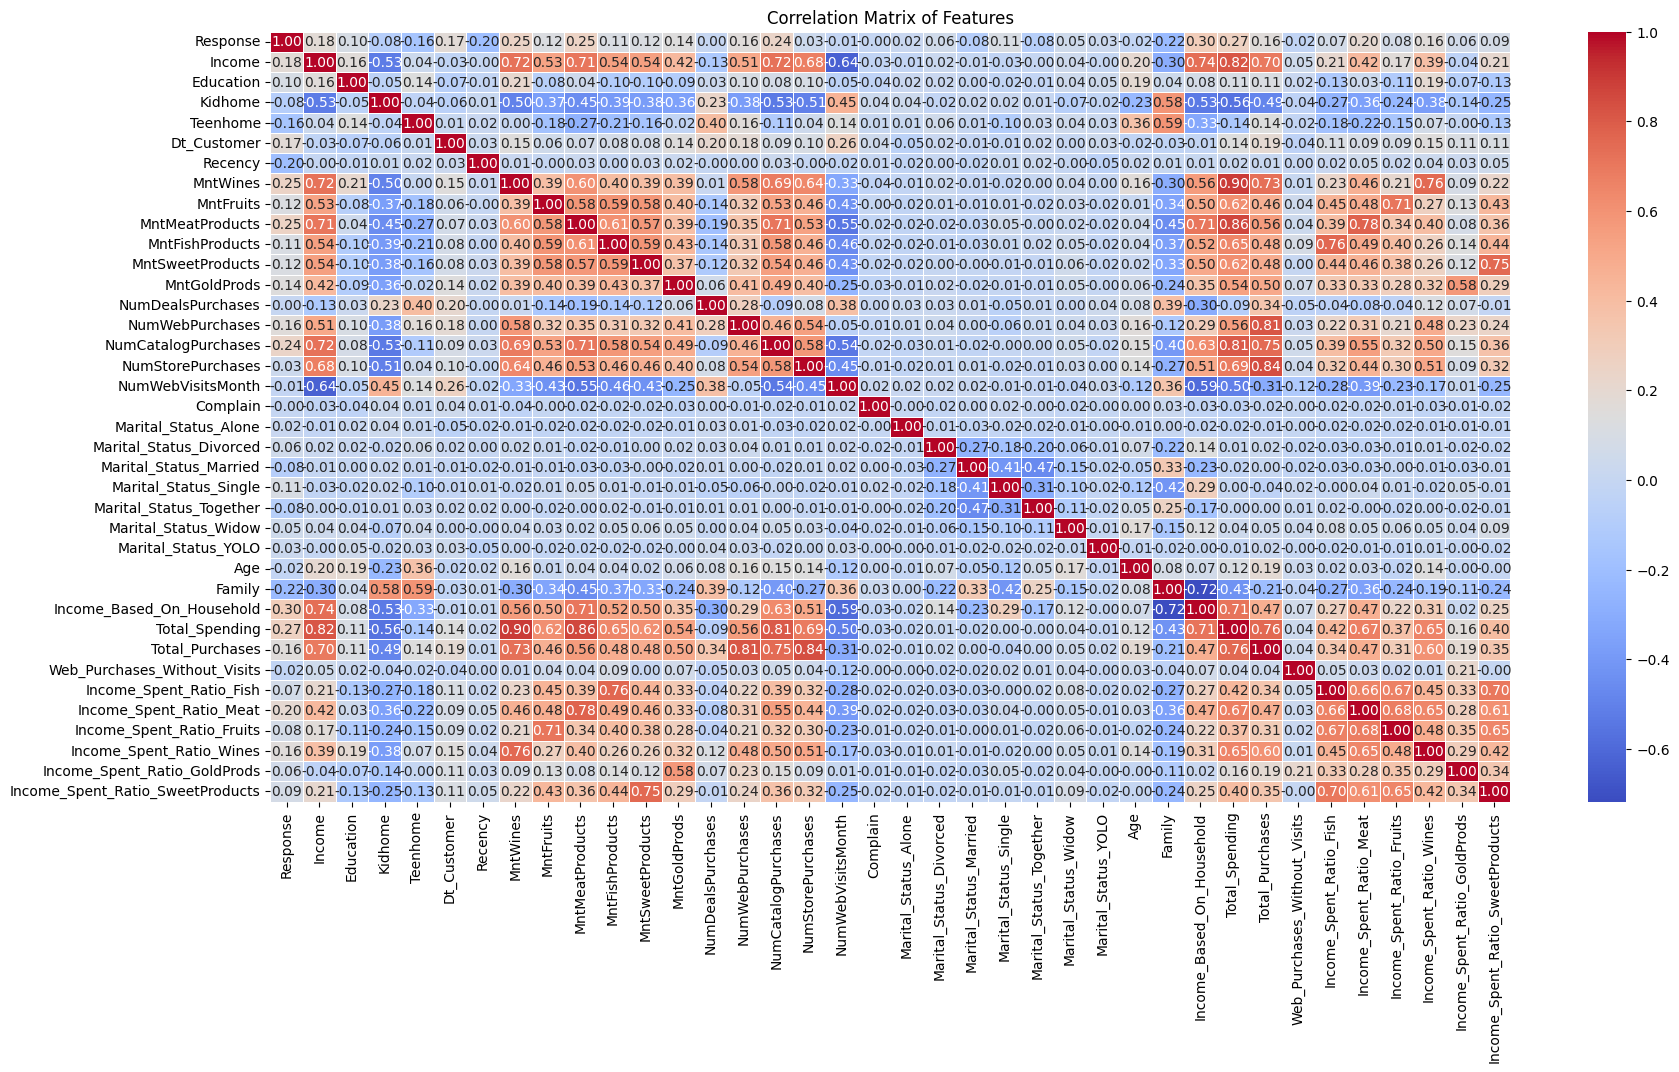

In [138]:
# Assuming df is your DataFrame containing all the features
correlation_matrix = df.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [139]:
response_corr = df.corr()["Response"].sort_values(ascending=False)
print(response_corr)

Response                            1.000000
Income_Based_On_Household           0.300719
Total_Spending                      0.267553
MntMeatProducts                     0.254640
MntWines                            0.245739
NumCatalogPurchases                 0.240819
Income_Spent_Ratio_Meat             0.197141
Income                              0.176858
Dt_Customer                         0.174596
Income_Spent_Ratio_Wines            0.160962
Total_Purchases                     0.157956
NumWebPurchases                     0.157813
MntGoldProds                        0.143442
MntFruits                           0.124483
MntSweetProducts                    0.119960
MntFishProducts                     0.109869
Marital_Status_Single               0.105739
Education                           0.099838
Income_Spent_Ratio_SweetProducts    0.085974
Income_Spent_Ratio_Fruits           0.078741
Income_Spent_Ratio_Fish             0.069926
Income_Spent_Ratio_GoldProds        0.061024
Marital_St

# Modeling

In [140]:
df

Response   Income  Education  Kidhome  Teenhome  Dt_Customer  Recency  \
0            1  84835.0          3        0         0         3543        0   
1            1  57091.0          3        0         0         3544        0   
2            0  67267.0          3        0         1         3577        0   
3            0  32474.0          3        1         1         3401        0   
4            1  21474.0          3        1         0         3494        0   
...        ...      ...        ...      ...       ...          ...      ...   
2235         0  66476.0          5        0         1         3891       99   
2236         0  31056.0          2        1         0         4053       99   
2237         0  46310.0          3        1         0         4369       99   
2238         0  65819.0          3        0         0         4107       99   
2239         1  94871.0          5        0         2         4432       99   

      MntWines  MntFruits  MntMeatProducts  ...  Income_Based_On_Household  \
0          189        104              379  ...               84835.000000   
1          464          5               64  ...               57091.000000   
2          134         11               59  ...               22422.333333   
3           10          0                1  ...                8118.500000   
4            6         16               24  ...               10737.000000   
...        ...        ...              ...  ...                        ...   
2235       372         18              126  ...               33238.000000   
2236         5         10               13  ...               10352.000000   
2237       185          2               88  ...               23155.000000   
2238       267         38              701  ...               32909.500000   
2239       169         24              553  ...               23717.750000   

      Total_Spending  Total_Purchases  Web_Purchases_Without_Visits  \
0               1190               15                         False   
1                577               18                         False   
2                251               11                         False   
3                 11                4                         False   
4                 91                8                         False   
...              ...              ...                           ...   
2235             689               20                         False   
2236              55                5                         False   
2237             309               14                         False   
2238            1383               20                         False   
2239            1078               18                         False   

      Income_Spent_Ratio_Fish  Income_Spent_Ratio_Meat  \
0                    0.000654                 0.002234   
1                    0.000061                 0.000561   
2                    0.000111                 0.000439   
3                    0.000000                 0.000015   
4                    0.000256                 0.000559   
...                       ...                      ...   
2235                 0.000354                 0.000948   
2236                 0.000048                 0.000209   
2237                 0.000162                 0.000950   
2238                 0.001132                 0.005325   
2239                 0.000991                 0.002914   

      Income_Spent_Ratio_Fruits  Income_Spent_Ratio_Wines  \
0                      0.000613                  0.001114   
1                      0.000044                  0.004064   
2                      0.000082                  0.000996   
3                      0.000000                  0.000154   
4                      0.000373                  0.000140   
...                         ...                       ...   
2235                   0.000135                  0.002798   
2236                   0.000161                  0.000080   
2237                 

## Feature Selection (Manual)

In [141]:
selected_features = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                     'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 
                     'NumCatalogPurchases', 'Age','Income', 'Dt_Customer',
                     'Marital_Status_Single', 'Education',
                    'Marital_Status_Divorced', 'Marital_Status_Widow', 'NumStorePurchases',
                    'Marital_Status_YOLO', 'Marital_Status_Married','Kidhome','Teenhome',
                    'Recency','Web_Purchases_Without_Visits','Marital_Status_Together','NumWebVisitsMonth',
                    'Age','Income_Based_On_Household', 'Total_Spending', 'Income_Spent_Ratio_Meat','Family']



all_columns = df.columns.tolist()

# Columns that are not in selected_features
columns_not_in_selected = set(all_columns) - set(selected_features)

# Convert the result back to a list if needed
columns_not_in_selected = list(columns_not_in_selected)

# Print or use the result as needed
print("Columns not in selected_features:", columns_not_in_selected)


Columns not in selected_features: ['Response', 'Marital_Status_Alone', 'Income_Spent_Ratio_Wines', 'Complain', 'NumDealsPurchases', 'Total_Purchases', 'Income_Spent_Ratio_GoldProds', 'Income_Spent_Ratio_Fish', 'Income_Spent_Ratio_SweetProducts', 'Income_Spent_Ratio_Fruits']


In [142]:

X = df[selected_features]
y = df['Response']



In [143]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1555, 29), (667, 29), (1555,), (667,))

In [144]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [145]:
ros = RandomUnderSampler(random_state = 0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)

X_train_resampled.shape, y_train_resampled.shape

((468, 29), (468,))

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import time
from scipy.stats import uniform, randint

param_distributions = {
    #'C': uniform(0.1, 999.9),  # Continuous uniform distribution from 0.1 to 1000
    #'gamma': uniform(0.01, 9.99),  # Continuous uniform distribution from 0.01 to 10
    #'kernel': ['rbf', 'linear', 'poly'],
    'degree': randint(2, 5),  # Discrete uniform distribution from 2 to 4
    #'class_weight': [None, 'balanced'],
    #'shrinking': [True, False],
}

svm = SVC(random_state=0)

grid_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions,
                                   n_iter=10, cv=5, scoring='recall', random_state=0)
start_time = time.time()

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'degree': 2}


In [147]:
import time
#clf_lr = LogisticRegression(random_state=0)
#clf_lr.fit(X_train, y_train)
#clf_lr = grid_search.best_estimator_
#start_time = time.time()
#svm_model = SVC()
#svm_model.fit(X_train_resampled, y_train_resampled
svm_model = grid_search.best_estimator_

In [148]:

preds_selected = svm_model.predict(X_test_scaled)
end_time = time.time()


In [149]:
# Evaluate model performance with selected features

acc_selected = accuracy_score(y_test, preds_selected)
prec_selected = precision_score(y_test, preds_selected)
rec_selected = recall_score(y_test, preds_selected)
f1_selected = f1_score(y_test, preds_selected)
auc_selected = roc_auc_score(y_test, preds_selected)
running_time = end_time - start_time


In [150]:
# Print evaluation metrics
print("Accuracy with selected features: %.4f" % acc_selected)
print("Precision with selected features: %.4f" % prec_selected)
print("Recall with selected features: %.4f" % rec_selected)
print("F1 with selected features: %.4f" % f1_selected)
print("AUC with selected features: %.4f" % auc_selected)
print("Running time: {:.2f} seconds".format(running_time))

Accuracy with selected features: 0.7511
Precision with selected features: 0.3590
Recall with selected features: 0.8400
F1 with selected features: 0.5030
AUC with selected features: 0.7877
Running time: 0.48 seconds


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Performance metrics on the training set
train_accuracy = accuracy_score(y_train, svm_model.predict(X_train_scaled))
train_precision = precision_score(y_train, svm_model.predict(X_train_scaled))
train_recall = recall_score(y_train, svm_model.predict(X_train_scaled))
train_f1 = f1_score(y_train, svm_model.predict(X_train_scaled))
#train_auc = roc_auc_score(y_train, svm_model.predict_proba(X_train)[:, 1])

# Performance metrics on the test set
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test_scaled))
test_precision = precision_score(y_test, svm_model.predict(X_test_scaled))
test_recall = recall_score(y_test, svm_model.predict(X_test_scaled))
test_f1 = f1_score(y_test, svm_model.predict(X_test_scaled))
#test_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Print and compare the metrics
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1 Score:", train_f1)
#print("AUC:", train_auc)
print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1 Score:", test_f1)
#print("AUC:", test_auc)


Training Set Metrics:
Accuracy: 0.7620578778135049
Precision: 0.37218045112781956
Recall: 0.8461538461538461
F1 Score: 0.5169712793733682

Test Set Metrics:
Accuracy: 0.7511244377811095
Precision: 0.358974358974359
Recall: 0.84
F1 Score: 0.5029940119760479


In [152]:
cm_lr = confusion_matrix(y_pred=preds_selected, y_true=y_test)

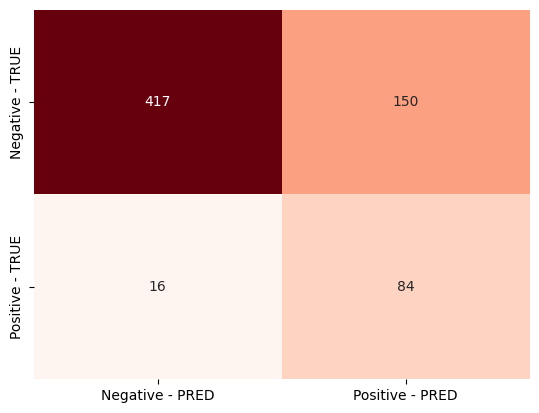

In [153]:
fig, ax = plt.subplots()

sns.heatmap(cm_lr, ax=ax, cmap='Reds', annot=True, fmt='g', cbar=False,
            xticklabels=['Negative - PRED', 'Positive - PRED'],
            yticklabels=['Negative - TRUE', 'Positive - TRUE'])

plt.show()

In [154]:
models_evaluation = pd.DataFrame({
    'Model': [], 
    'Precision': [],
    'Recall': [],
    'Accuracy': []
})

def concat_evaluations(df, y_pred, model):
    new_model = pd.DataFrame({
        'Model': [model],
        'Precision': [precision_score(y_pred=y_pred, y_true=y_test)],
        'Recall': [recall_score(y_pred=y_pred, y_true=y_test)],
        'Accuracy': [accuracy_score(y_pred=y_pred, y_true=y_test)]
    })
    
    models_evaluation = pd.concat([df, new_model], axis=0, ignore_index=True)
    
    return models_evaluation

In [155]:
models_evaluation = concat_evaluations(models_evaluation, preds_selected, 'LogisticRegression')

In [156]:
models_evaluation

Model  Precision  Recall  Accuracy
0  LogisticRegression   0.358974    0.84  0.751124